In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
excelFile = pd.ExcelFile(r"Cardiac_Outcomes.xlsx")
HosDis = pd.read_excel(excelFile, 'Hospitalization_Discharge')
CardiacComp = pd.read_excel(excelFile, 'CardiacComplications')
Respons = pd.read_excel(excelFile, 'Responsivenes')
PaHi = pd.read_excel(excelFile, 'PatientHistory')
Labs = pd.read_excel(excelFile, 'Labs')
Demog = pd.read_excel(excelFile, 'Demography')
PatPre = pd.read_excel(excelFile, 'Patient_Precriptions')

1. How many patients were registered in each unique occupation?

In [3]:
print("Number of patients registered in each unique occupation:")
#Demog['occupation'].value_counts()

(Demog.groupby('occupation')['inpatient_number'].agg(['nunique']))

Number of patients registered in each unique occupation:


nunique
occupation            
Officer              7
Others              89
UrbanResident     1670
farmer             198
worker              17

2. Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

range(1, 21, 5)
['1-5', '6-10', '11-15']


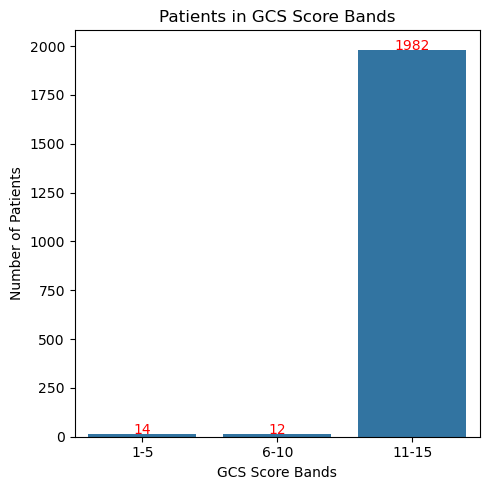

In [4]:
max_score = Respons['GCS'].max()
min_score = Respons['GCS'].min() #find min
#print(max_score, min_score)
bins = range(1, max_score +6, 5)
print(bins)
labels = [f'{i}-{i+4}' for i in range(1, max_score +1 , 5)]
print(labels)


Respons['GCS_band'] = pd.cut(x=Respons['GCS'], bins=bins, labels=labels, right=False)
# print(Respons['GCS_band'].head(15))

# number of patients in each band
gcs_band_counts = Respons['GCS_band'].value_counts().sort_index()

# Convert the counts to a DataFrame
gcs_band_counts_Res = gcs_band_counts.reset_index()
gcs_band_counts_Res.columns = ['GCS_band', 'Patient_Count']

# Plot the distribution
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x='GCS_band', y='Patient_Count', data=gcs_band_counts_Res)
plt.xlabel('GCS Score Bands')
plt.ylabel('Number of Patients')
plt.title('Patients in GCS Score Bands')

for index, row in gcs_band_counts_Res.iterrows():
    barplot.text(row.name, row.Patient_Count, round(row.Patient_Count), color='red', ha="center")
    
    
plt.tight_layout()
plt.show()


3. Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [5]:
HosDis['Admission_date'] = pd.to_datetime(HosDis['Admission_date'], format='%m/%d/%Y')
HosDis['Discharge_date'] = HosDis['Admission_date'] + pd.to_timedelta(HosDis['dischargeDay'], unit='D')

HosDis.to_excel('Hospitalization_Discharge.xlsx', index=False)
#print(HosDis.head())
HosDis

inpatient_number DestinationDischarge admission_ward admission_way  \
0               857781                 Home     Cardiology  NonEmergency   
1               743087                 Home     Cardiology  NonEmergency   
2               866418                 Home     Cardiology  NonEmergency   
3               775928                 Home     Cardiology     Emergency   
4               810128                 Home     Cardiology  NonEmergency   
...                ...                  ...            ...           ...   
2003            740689   HealthcareFacility    GeneralWard     Emergency   
2004            734280   HealthcareFacility    GeneralWard     Emergency   
2005            781004   HealthcareFacility     Cardiology     Emergency   
2006            744870              Unknown     Cardiology  NonEmergency   
2007            791864                 Home     Cardiology     Emergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
0              Cardiology            1                 NaN     OxygenTherapy   
1              Cardiology            1                 NaN     OxygenTherapy   
2              Cardiology            2                 NaN     OxygenTherapy   
3              Cardiology            1                 NaN     OxygenTherapy   
4              Cardiology            1                 NaN     OxygenTherapy   
...                   ...          ...                 ...               ...   
2003          GeneralWard            1                 NaN     OxygenTherapy   
2004          GeneralWard            1                 NaN     OxygenTherapy   
2005           Cardiology            1                 NaN     OxygenTherapy   
2006           Cardiology            1                 IMV     OxygenTherapy   
2007           Cardiology            1                 NaN     OxygenTherapy   

      dischargeDay Admission_date  ... re_admission_within_28_days  \
0               11     2017-01-24  ...                           0   
1                8     2017-05-05  ...                           0   
2                5     2016-11-18  ...                           0   
3               11     2017-10-02  ...                           1   
4                5     2019-11-17  ...                           0   
...            ...            ...  ...                         ...   
2003             5     2016-02-07  ...                           0   
2004             8     2017-03-29  ...                           0   
2005            14     2018-01-22  ...                           0   
2006             1     2019-11-27  ...                           0   
2007             6     2017-02-17  ...                           0   

      death_within_3_months  re_admission_within_3_months  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   
...                     ...                           ...   
2003                      0                             0   
2004                      0                             0   
2005                      0                             1   
2006                      1                             0   
2007                      0                             0   

      death_within_6_months  re_admission_within_6_months  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   
...                     ...                           ...   
2003                      0                             0   
2004                      0                             0   
2005     

4. What percentage of patients had Biventricular heart failure?

In [6]:
hf_types = CardiacComp['type_of_heart_failure'].unique()
print(hf_types)
hf_both = CardiacComp[CardiacComp['type_of_heart_failure'] == "Both"]


total_patients = len(CardiacComp)
print("Total number of patients",total_patients)


percentage_hf_both = (len(hf_both) / total_patients) * 100
print("Total number of patients with value 'Both':",len(hf_both))

print("Percentage of patients with Biventicular heart failure:", "{:.2f}%".format(percentage_hf_both))

['Both' 'Right' 'Left']
Total number of patients 2008
Total number of patients with value 'Both': 1480
Percentage of patients with Biventicular heart failure: 73.71%


5.What is the ratio of patients who were responsive to pain vs responsive to sound?

In [7]:
response_types = Respons['consciousness'].unique()
print(response_types)

responsive_pain = Respons[Respons['consciousness'] == "ResponsiveToPain"]
responsive_sound = Respons[Respons['consciousness'] == "ResponsiveToSound"]


pain_count = len(responsive_pain)
sound_count = len(responsive_sound)


ratio_resp = pain_count / sound_count


print("Ratio of patients Responsive To Pain vs Responsive To Sound:", ratio_resp)


['Clear' 'ResponsiveToPain' 'ResponsiveToSound' 'Nonresponsive']
Ratio of patients Responsive To Pain vs Responsive To Sound: 0.21052631578947367


6.What was the average age group of the patients that had an outcome of 'Alive'?

In [8]:
all_patients = HosDis[['outcome_during_hospitalization','inpatient_number']]
age_demo = Demog[['inpatient_number', 'ageCat']]

all_age = pd.merge(all_patients,age_demo, on = 'inpatient_number')

alive_age = all_age[all_age['outcome_during_hospitalization']=='Alive']

average_age_group = alive_age['ageCat'].mode()[0]

print("Average Age Group of Patients who had an outcome of 'Alive':", average_age_group)
print("Number of patients who had an outcome of Alive: ", len(alive_age))

Average Age Group of Patients who had an outcome of 'Alive': 69-79
Number of patients who had an outcome of Alive:  1890


7.Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

In [9]:
import missingno as msno

Demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   inpatient_number  2008 non-null   int64  
 1   gender            2008 non-null   object 
 2   weight            2008 non-null   float64
 3   height            2008 non-null   float64
 4   BMI               2008 non-null   float64
 5   occupation        1981 non-null   object 
 6   ageCat            2008 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 109.9+ KB


<Axes: >

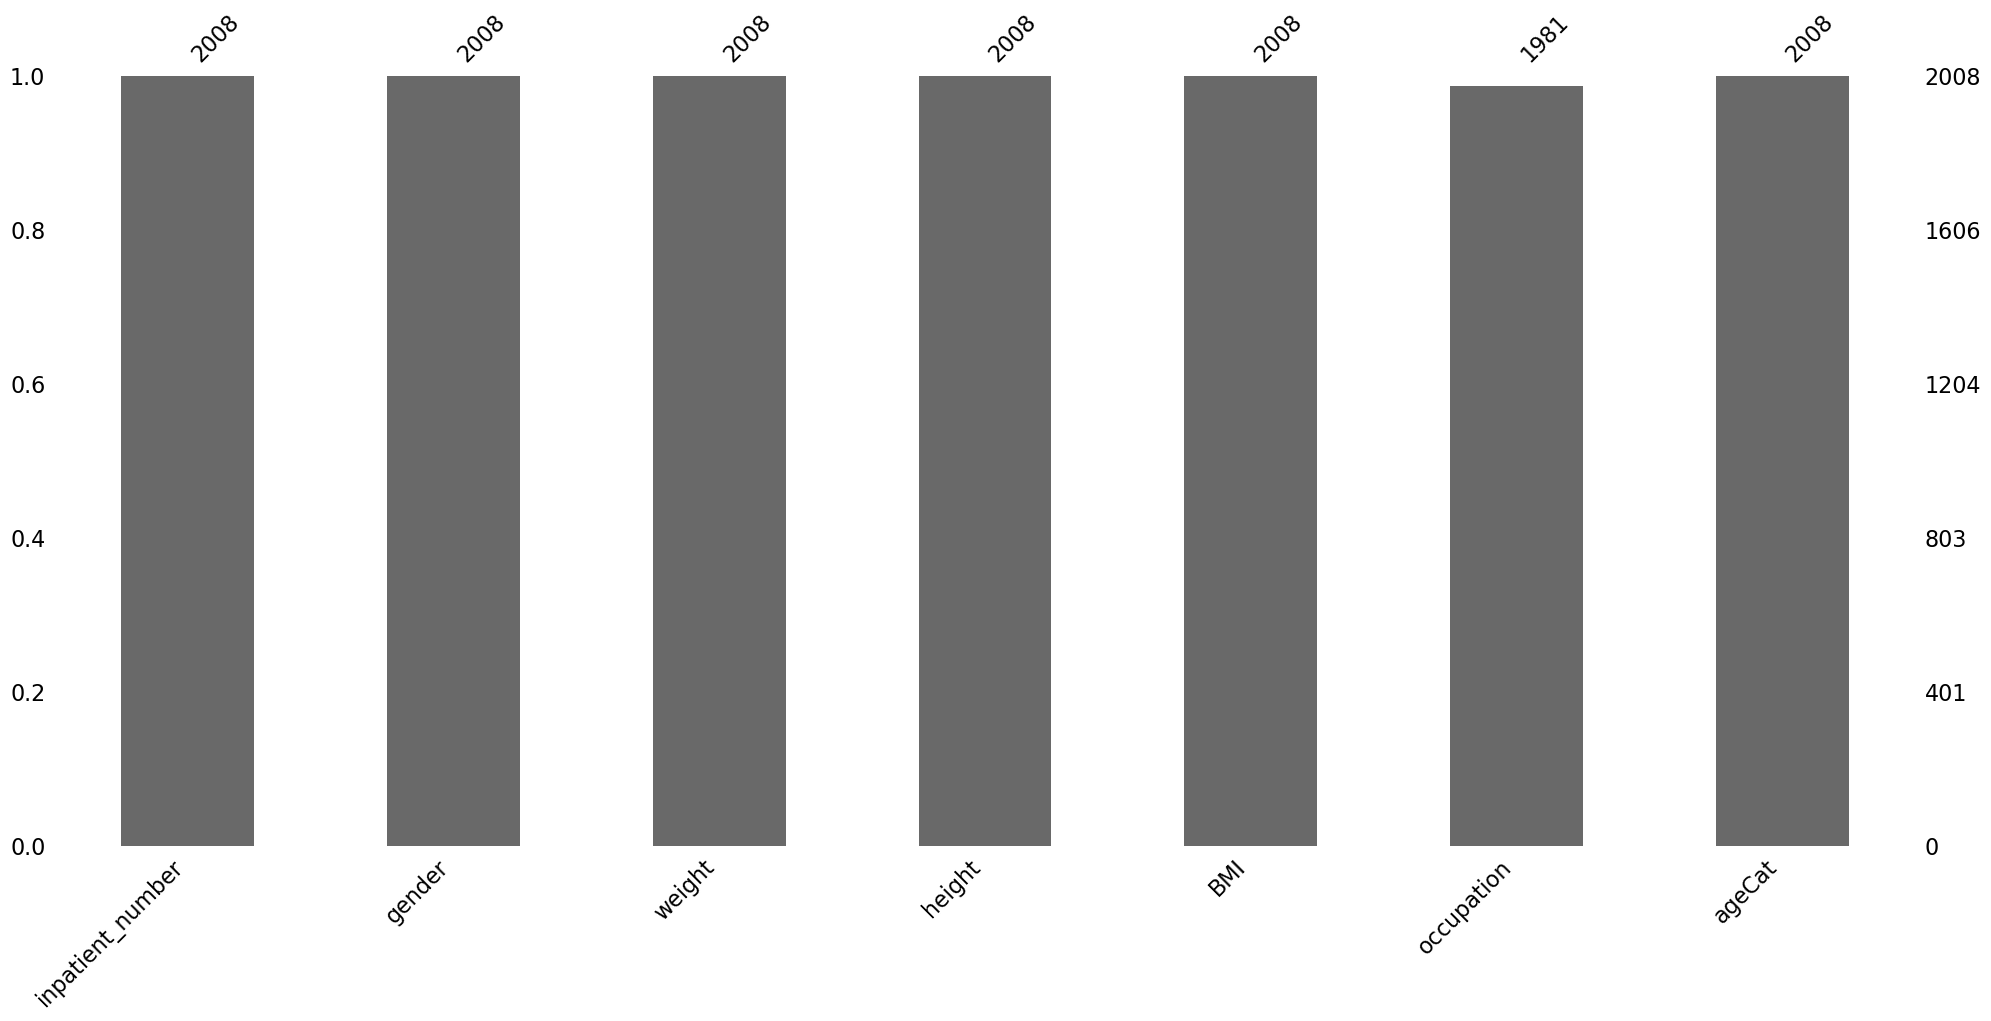

In [10]:
msno.bar(Demog)

In [11]:
#Additional functions
# msno.heatmap(Demog)
# msno.dendrogram(Demog)
# msno.matrix(Demog)

8.Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

total deaths:  11


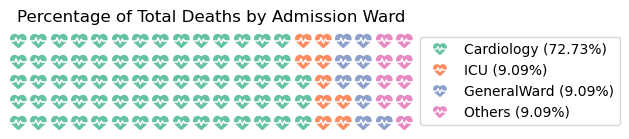

In [12]:
from pywaffle import Waffle

deaths = HosDis[HosDis['outcome_during_hospitalization'] == 'Dead']

# no of deaths
death_counts = deaths['admission_ward'].value_counts()


total_deaths = death_counts.sum()
print("total deaths: ",total_deaths)
death_percentage = (death_counts / total_deaths * 100).round(2)

# images are from Fonts Awesome
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=death_percentage, 
    labels=['{} ({}%)'.format(a, p) for a, p in zip(death_percentage.index, death_percentage)],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='heartbeat', icon_size=12, 
    icon_legend=True
)

plt.title('Percentage of Total Deaths by Admission Ward')
plt.show()


9.Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [13]:

a1 = np.array([[71, 32], [53, 94]])
a2 = np.array([[52, 64], [76, 88]])

mproduct = np.dot(a1, a2)

print("Matrix multiplication product:")
print(mproduct)


Matrix multiplication product:
[[ 6124  7360]
 [ 9900 11664]]


10.Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph 

                Column_Name  Missing_Percentage
0          inpatient_number                0.00
1          body_temperature                0.00
2                     pulse                0.00
3               respiration                0.00
4   systolic_blood_pressure                0.00
..                      ...                 ...
81         apolipoprotein_A                0.91
82         apolipoprotein_B                0.91
83              lipoprotein                0.91
80             homocysteine                0.93
64           cholinesterase                1.00

[107 rows x 2 columns]


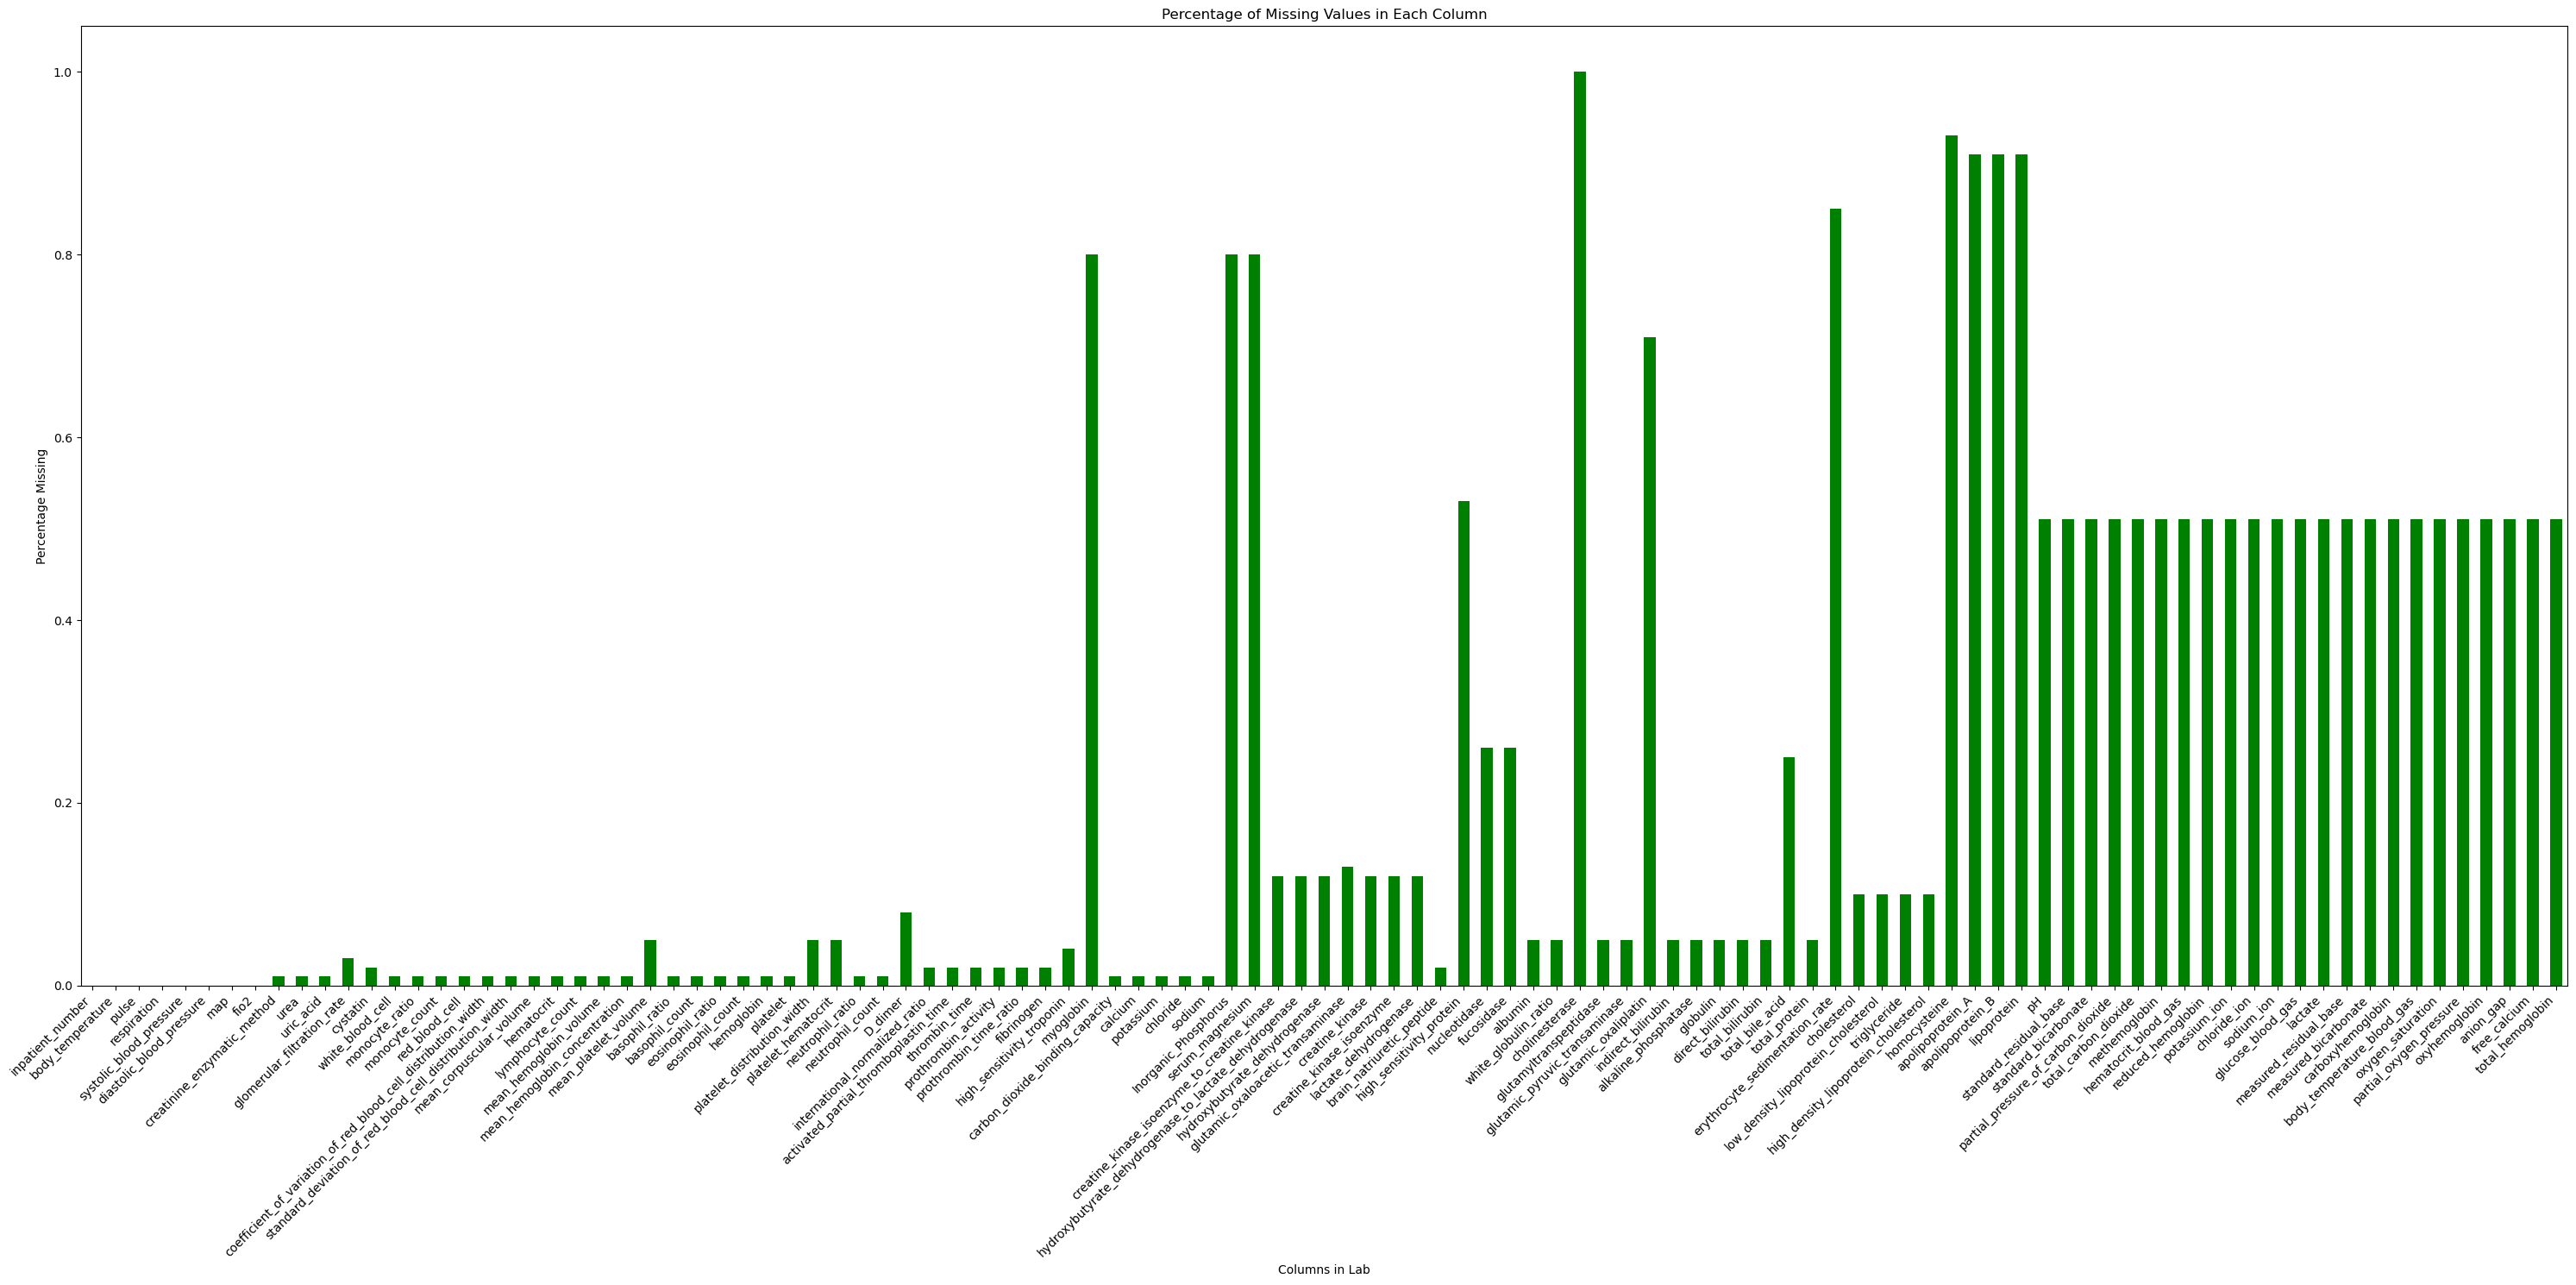

In [14]:
#Labs.info()
#msno.bar(Labs)
missing_percentage = (Labs.isnull().mean()).round(2) 

missing_percentage_df = pd.DataFrame({'Column_Name': missing_percentage.index, 'Missing_Percentage': missing_percentage.values})
#print(missing_percentage_df)
sorted_missingp = missing_percentage_df.sort_values(by='Missing_Percentage')
print(sorted_missingp)


plt.figure(figsize=(30,15))
missing_percentage.plot(kind='bar', color='green')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns in Lab')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

11.A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.
{2,9587456281,1252478965,7397260044}

In [15]:
numbers = [2, 9587456281, 1252478965, 7397260044]


for number in numbers:
   
    number_str = str(number)
    
    if len(number_str) == 10 and number_str[0] in ['7', '8', '9']:
        print("YES")
    else:
        print("NO")
 

NO
YES
NO
YES


12.If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [16]:
patients_outside_range = CardiacComp[(CardiacComp['left_ventricular_end_diastolic_diameter_LV'] < 3.5) | 
                                         (CardiacComp['left_ventricular_end_diastolic_diameter_LV'] > 5.6)]

num_patients_outside_range = len(patients_outside_range)
#print(num_patients_outside_range)
patients_with_map = pd.merge(patients_outside_range, Labs, on='inpatient_number', how='inner')
mmap = patients_with_map['map'].mean()
mmap
print("Number of patients with LVEDD outside the normal range:", num_patients_outside_range)
print("Mean Arterial Pressure (MAP) for patients with this condition:", mmap)


Number of patients with LVEDD outside the normal range: 1311
Mean Arterial Pressure (MAP) for patients with this condition: 96.21459445715739


13. Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

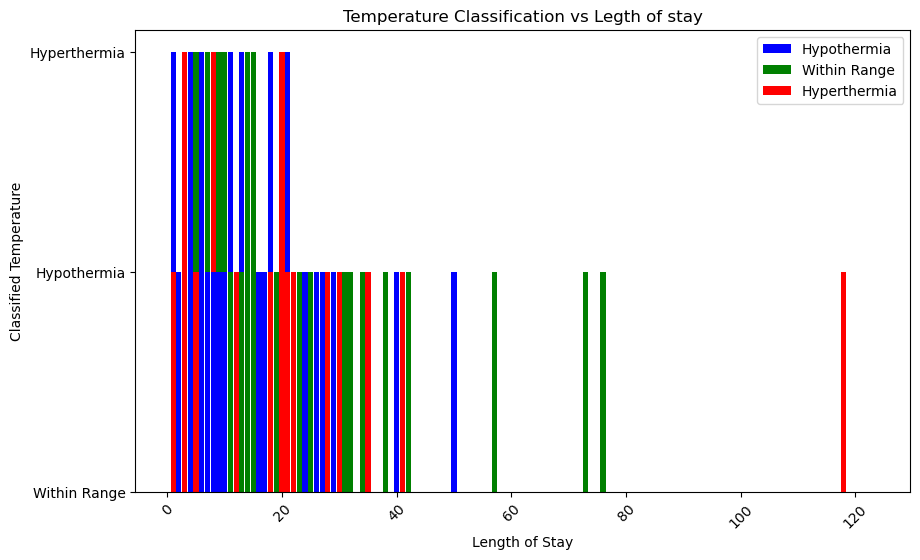

In [17]:
mergedLH = pd.merge(HosDis,Labs, on = 'inpatient_number')
 
def classify_temp(temp):
    if temp < 36.5:
        return 'Hypothermia'
    elif 36.5 <= temp <= 37.5:
        return 'Within Range'
    else:
        return 'Hyperthermia'
   

mergedLH['classified_temp'] = mergedLH['body_temperature'].apply(classify_temp)
#mergedLH

plt.figure(figsize=(10, 6))
bars = plt.bar(mergedLH['dischargeDay'], mergedLH['classified_temp'], color=['blue', 'green', 'red'], width = 0.9)
plt.xlabel('Length of Stay')
plt.ylabel('Classified Temperature')
plt.title('Temperature Classification vs Legth of stay')
plt.xticks(rotation=45)
plt.legend(bars, ['Hypothermia', 'Within Range', 'Hyperthermia'])

plt.show()


14. Find the list of patients whose DischargeDay is greater than the value given by the user

In [18]:
user_input_val = input("Please enter a number for  Discharge Day : ")
discharge_days_filtered = (HosDis.loc[:, ['inpatient_number','dischargeDay']])
print('Patients whose Discharge Day is greater than the value given: ')
discharge_days_filtered.loc[(HosDis['dischargeDay'] > int(user_input_val))]

Please enter a number for  Discharge Day : 77
Patients whose Discharge Day is greater than the value given: 


inpatient_number  dischargeDay
884             794077           123
1548            791880            88
1573            794784            82
1613            768711           118

15. Display a pie chart of number of patients in each category listed

-death_within_28_days
-re_admission_within_28_days
-death_within_3_months 
-re_admission_within_3_months 
-death_within_6_months 
-re_admission_within_6_months
-return_to_emergency_department_within_6_months

death_within_28_days                               37.0
re_admission_within_28_days                       140.0
death_within_3_months                              42.0
re_admission_within_3_months                      498.0
death_within_6_months                              57.0
re_admission_within_6_months                      773.0
return_to_emergency_department_within_6_months    775.0
dtype: float64


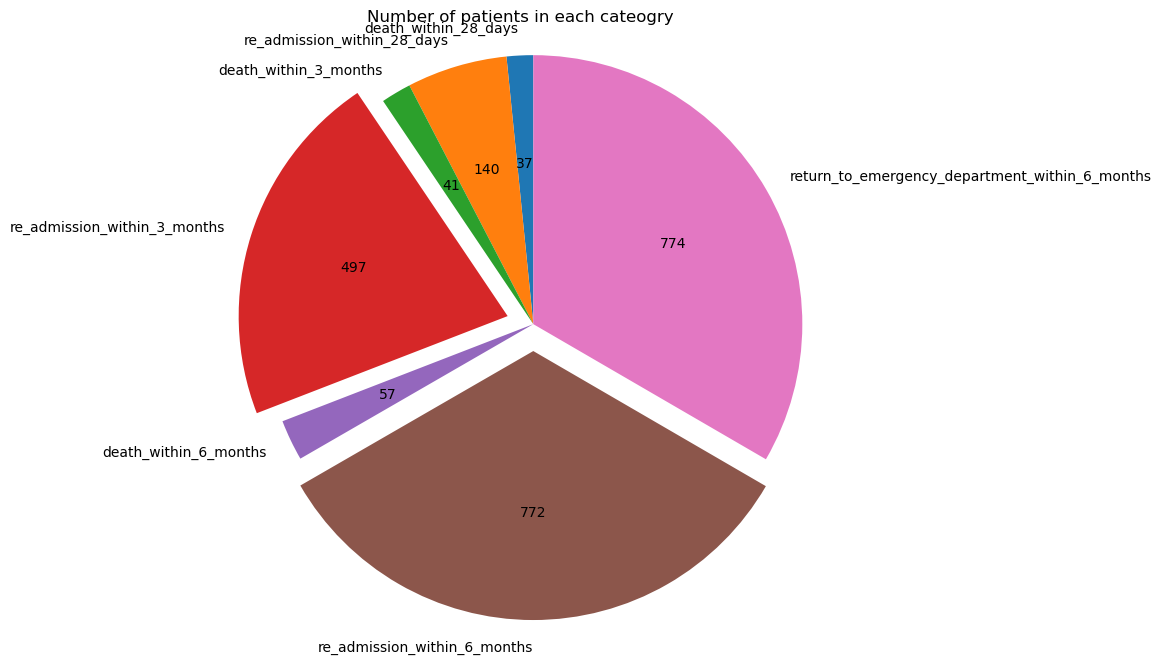

In [19]:
cat_table = HosDis[['death_within_28_days', 
're_admission_within_28_days', 
'death_within_3_months', 
're_admission_within_3_months', 
'death_within_6_months',  
're_admission_within_6_months', 
'return_to_emergency_department_within_6_months']]

category_counts = cat_table.sum()
print(category_counts)
#print(len(category_counts))


plt.figure(figsize=(8, 8))
plt.pie(category_counts, 
        labels=category_counts.index, 
        explode = (0.0, 0.0, 0.0,0.1,0.0,0.1,0.0),
        autopct=lambda pct: f"{int(pct / 100 * sum(category_counts))}", 
        startangle = 90 )
plt.title('Number of patients in each cateogry')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


16. Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [20]:
cardiac_col = CardiacComp[['inpatient_number', 'myocardial_infarction', 'congestive_heart_failure','peripheral_vascular_disease']]
#print(cardiac_col)
demo_col = Demog[['inpatient_number','BMI']]
labs_col = Labs[['inpatient_number', 'uric_acid']]

merged1 = pd.merge(cardiac_col, demo_col, on='inpatient_number')
#merged1
merged2 = pd.merge(merged1, labs_col, on ='inpatient_number')
#merged2

# Melt DataFrame
melted1 = pd.melt(merged2, id_vars=['uric_acid', 'BMI'], 
                    value_vars=['myocardial_infarction', 'congestive_heart_failure', 'peripheral_vascular_disease'],
                   var_name='Condition', value_name='Value')
#print(melted1)
# Pivot table
pivott = melted1.pivot_table(index='Condition', values=['uric_acid', 'BMI'], aggfunc='mean')

pivott

BMI  uric_acid
Condition                                        
congestive_heart_failure     21.791398  483.01864
myocardial_infarction        21.791398  483.01864
peripheral_vascular_disease  21.791398  483.01864

17. Using arrays and loops find the number of patients who were Admitted in the month of November

In [21]:
count = 0

for index, row in HosDis.iterrows():
    admission_month = row['Admission_date'].month
    
    if admission_month == 11:
        count += 1

print("Number of patients admitted in November:", count)


Number of patients admitted in November: 195


18.Create a heatmap on any columns of your choice including at least 1 lab value

<Axes: >

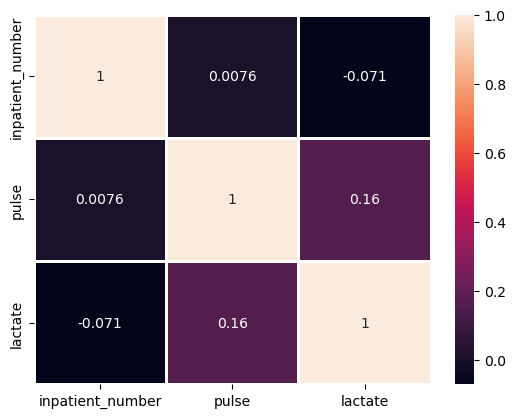

In [22]:

df = Labs[['inpatient_number', 'pulse','lactate']]

sns.heatmap(df.corr(), annot=True,linewidths=1)

19.Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

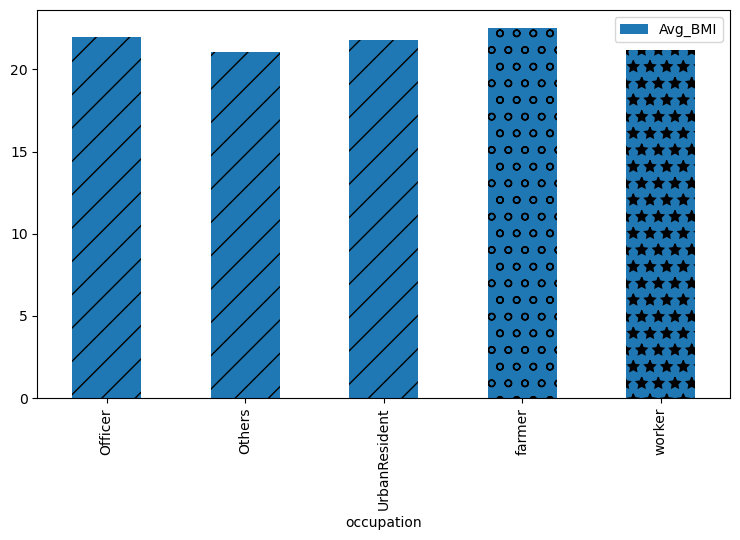

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Average BMI of each Occupation
avg_bmi_occ_df = Demog.groupby('occupation')['BMI'].agg(['mean'])

avg_bmi_occ_df.rename(columns={'mean':'Avg_BMI'},inplace= True) 

from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(data = avg_bmi_occ_df)
ax = plt.figure().add_subplot(111)
bars = df.plot(ax=ax, kind='bar')

hatches = ["*", "/", "o", "x"]
for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])

plt.show()

20.You are given three integers x,y,z representing the dimensions of a cuboid along with an integer n . 
Print a list of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n. 
x=1, y=1, z=2, n=3

In [25]:

x = 1
y = 1
z = 2
n = 3

coordinates = []


for i in range(x+1):
    for j in range(y+1):
        for k in range(z+1):
            if i + j + k != n:
                coordinates.append([i, j, k])

print(coordinates)

[[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


21.Given the names and grades for each student in a class of students, store them in a nested list and print the name(s) of any student(s) having the second lowest grade.
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

In [26]:
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]

#sort using lambda function, find lowest grade in index 1 and find student(s) who have that grade
sorted_students = sorted(python_students, key=lambda x: x[1])

second_low_grade = sorted(set([grade for name, grade in python_students]))[1]

students_with_second_lowest_grade = [name for name, grade in python_students if grade == second_low_grade]
print("Students with the second lowest grade:", students_with_second_lowest_grade)

Students with the second lowest grade: ['Harry', 'Berry']


22.Which patient was on the most number of prescribed drugs? What was his age and outcome?

In [28]:
merged1 = pd.merge(PatPre, Demog, on='inpatient_number')
merged2 = pd.merge(merged1, HosDis, on='inpatient_number')


drug_count = PatPre.groupby('inpatient_number')['Drug_name'].nunique()
max_drugs_patient = drug_count.idxmax()
max_drugs_count = drug_count.max()
print(f'Patient with inpatient number {max_drugs_patient} has the most number of drugs: {max_drugs_count}')

patient_details = merged2[merged2['inpatient_number'] == max_drugs_patient]
ageCategory = patient_details['ageCat'].iloc[0]
outcome = patient_details['outcome_during_hospitalization'].iloc[0]

print("Age category of the patient with the most drugs:", ageCategory)
print("Outcome of the patient with the most drugs:", outcome)


Patient with inpatient number 777204 has the most number of drugs: 16
Age category of the patient with the most drugs: 79-89
Outcome of the patient with the most drugs: Alive


23.How many patients were prescribed Digoxin?

In [29]:
Pat_Digoxin = PatPre[PatPre['Drug_name'] == "Digoxin tablet"].value_counts()
print("Number of patients who were prescribed the drug Digoxin:" ,len(Pat_Digoxin))

Number of patients who were prescribed the drug Digoxin: 999


24.What columns indicate a prescence of anemia? Create a severity score for anemia and prove or disprove a correlation to Length of stay

columns indicate a prescence of anemia:
hemoglobin
hematocrit
red_blood_cell
mean_corpuscular_volume

As seen in the co-relation graph, Anemia Scocre and Lenght of Stay are Co-Related


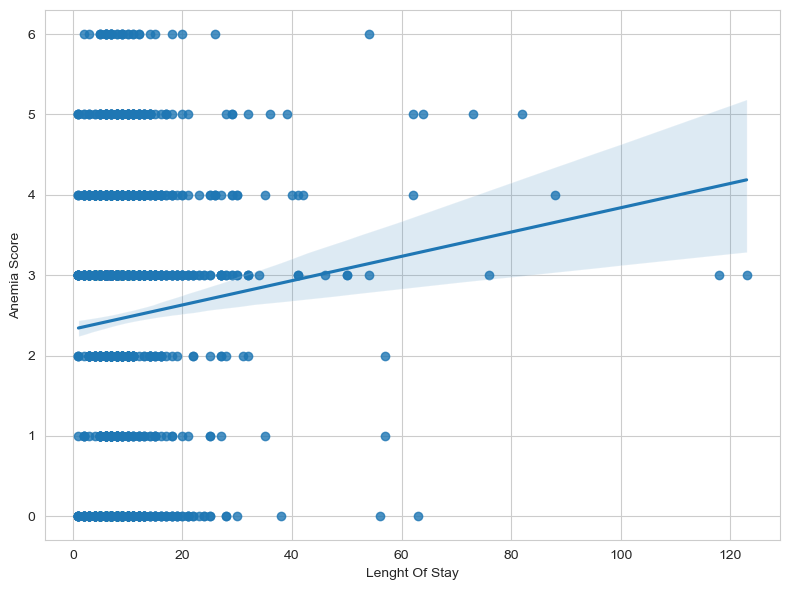

For Hemoglobin score calculation: Normal mean value of Hgb is taken (Male and Female)


<Figure size 800x400 with 0 Axes>

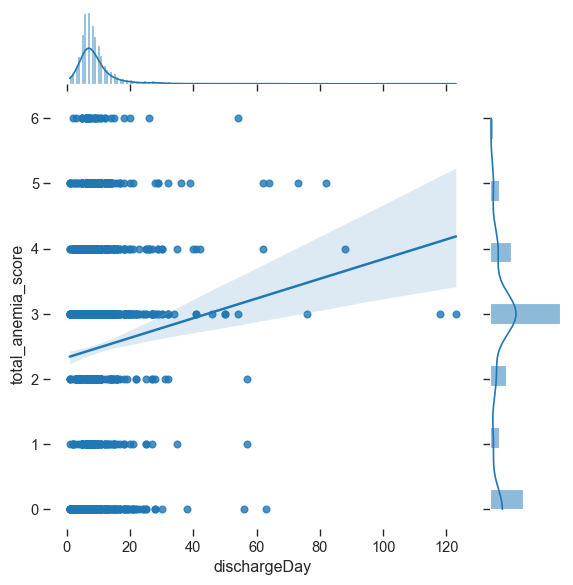

In [30]:
# Anemia Score: Hemoglobin < 14 g/dL (130 g/L), hematocrit < 42% (< 0.40), or RBC < 4.2 million/mcL (< 4.5 × 10 12/L)

# Functions to calculate Anemia scoce based on olumns indicate a prescence of anemia

anemia_indicators = Labs[['inpatient_number','hemoglobin', 'hematocrit', 'red_blood_cell', 'mean_corpuscular_volume']].copy()
#echo_df.info()
def score_hemoglobin(hgb):
    if hgb >=130:
        return 0
    elif (hgb>=100) & (hgb <130):
        return 1
    elif (hgb>=80) & (hgb <100):
        return 2
    elif (hgb>=65) & (hgb <80):
        return 3
    else:
        return 0
anemia_indicators['hemoglobin_score'] = anemia_indicators['hemoglobin'].apply(score_hemoglobin)

def score_hematocrit(x):
    if pd.isnull(x):
        return 0
    elif x > 0.40:
        return 0
    else:
        return 1
anemia_indicators['hematocrit_score'] = anemia_indicators['hematocrit'].apply(score_hematocrit)

def score_red_blood_cell(x):
    if pd.isnull(x):
        return 0
    elif x > 4.2:
        return 0
    else:
        return 1
   
anemia_indicators['red_blood_cell_score'] = anemia_indicators['red_blood_cell'].apply(score_red_blood_cell)

def score_mean_corpuscular_volume(x):
    if pd.isnull(x):
        return 0
    elif x > 80:
        return 0
    else:
        return 1
anemia_indicators['mean_corpuscular_volume_score'] = anemia_indicators['mean_corpuscular_volume'].apply(score_mean_corpuscular_volume)

anemia_indicators['total_anemia_score'] = (anemia_indicators['hemoglobin_score'] +
                          anemia_indicators['hematocrit_score'] +
                          anemia_indicators['red_blood_cell_score'] +
                          anemia_indicators['mean_corpuscular_volume_score'] )

anemia_ind_df = anemia_indicators.merge(HosDis[['inpatient_number','dischargeDay']], on ='inpatient_number')
#anemia_ind_df

final_anmemia_df = anemia_ind_df[['inpatient_number','total_anemia_score', 'dischargeDay']].copy()
#final_anmemia_df

anm_scoring_columns = ['hemoglobin', 'hematocrit', 'red_blood_cell', 'mean_corpuscular_volume']
print('columns indicate a prescence of anemia:')
print(*anm_scoring_columns, sep = "\n")
print()
print('As seen in the co-relation graph, Anemia Scocre and Lenght of Stay are Co-Related')

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.regplot(x='dischargeDay', y='total_anemia_score', data=final_anmemia_df)
plt.xlabel("Lenght Of Stay")
plt.ylabel("Anemia Score")
plt.show()

plt.figure(figsize=(8,4))
sns.set_style('ticks')
sns.set_context('paper',font_scale=1.2) 
sns.jointplot(data=final_anmemia_df, x='dischargeDay', y='total_anemia_score', kind='reg')
sns.despine(left=True, bottom=True)

print('For Hemoglobin score calculation: Normal mean value of Hgb is taken (Male and Female)')

25.Using GCS score, how many patients are considered to be in a coma?
Severe, GCS ≤ 8
Moderate, GCS 9–12
Minor, GCS ≥ 13.[9]

In [31]:
GCS_df = Respons[['inpatient_number','GCS']].copy()


GCS_Score = GCS_df[GCS_df.GCS <=8]

print("Number of patients who are considered to be in coma:" ,len(GCS_Score))

Number of patients who are considered to be in coma: 19


26.Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [32]:
# Function to generate an age between the age group given for each patient
def generate_random_age(age):
    if age == '21-29':
        return np.random.randint(21,29)
    elif age == '29-39':
        return np.random.randint(29,39)
    elif age == '39-49':
        return np.random.randint(39,49)
    elif age == '49-59':
        return np.random.randint(49,59)      
    elif age == '59-69':
        return np.random.randint(59,69)      
    elif age == '69-79':
        return np.random.randint(69,79)     
    elif age == '79-89':
        return np.random.randint(79,89)      
    elif age == '89-99':
        return np.random.randint(89,99)      
    else:
        return np.random.randint(0,20)   

# Apply the function to the ageCat column using the apply() function

updated_Demog1 = Demog
updated_Demog1['Age'] = Demog['ageCat'].apply(generate_random_age)
updated_Demog1.head(5)

# Find the Average Age of Patients

patients_avg_Age = updated_Demog1['Age'].mean()
print('Average Age of the patients : ' + str( round(patients_avg_Age, 2) ))


Average Age of the patients : 69.43


27.Using the age column generated in Q.26, calculate year of birth for each patient

In [33]:
# importing date class from datetime module 
from datetime import date 
  
# creating the date object of today's date 
todays_date = date.today() 

# Function to calculate year of birth for each patient
def birth_year(age):
    return todays_date.year - age

updated_Demog2 = updated_Demog1
updated_Demog2['Birth Year'] = updated_Demog1['Age'].apply(birth_year)
updated_Demog2


inpatient_number  gender  weight  height        BMI     occupation  \
0               857781    Male    50.0    1.64  18.590125  UrbanResident   
1               743087  Female    51.0    1.63  19.195303  UrbanResident   
2               866418    Male    70.0    1.70  24.221453         farmer   
3               775928    Male    65.0    1.70  22.491349  UrbanResident   
4               810128  Female    76.0    1.55  31.633715  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
2003            740689  Female    35.0    1.50  15.555556         Others   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   
2005            781004    Male    75.0    1.70  25.951557  UrbanResident   
2006            744870    Male    40.0    1.50  17.777778  UrbanResident   
2007            791864  Female    45.0    1.55  18.730489  UrbanResident   

     ageCat  Age  Birth Year  
0     69-79   69        1955  
1     69-79   73        1951  
2     59-69   60        1964  
3     69-79   77        1947  
4     69-79   75        1949  
...     ...  ...         ...  
2003  79-89   83        1941  
2004  79-89   86        1938  
2005  39-49   44        1980  
2006  49-59   55        1969  
2007  79-89   84        1940  

[2008 rows x 9 columns]

28.Store patient number and gender in a dictionary as a pair of values. Show the first 10 values

In [34]:
import itertools

dict_Demo = Demog.set_index('inpatient_number')['gender'].to_dict()

N=10
First_ten = dict(itertools.islice(dict_Demo.items(),N))
First_ten

{857781: 'Male',
 743087: 'Female',
 866418: 'Male',
 775928: 'Male',
 810128: 'Female',
 823318: 'Female',
 844094: 'Male',
 787530: 'Female',
 795420: 'Female',
 829801: 'Female'}

29.What percentage of those in a coma also have diabetes?

In [35]:
df = Respons[['inpatient_number','GCS']].copy()
df1 = PaHi[['inpatient_number','diabetes']]

Coma_Patients = df.loc[(df["GCS"]<=8)]
Diabetic_Patients= df1.loc[(df1["diabetes"]==1)]

#patients with coma and diabetes
result = pd.merge(Coma_Patients ,Diabetic_Patients , how='inner', on=['inpatient_number'])
percentage =(( len(result)/len(Coma_Patients) )* 100)
RPerct = round(percentage,2)


print(" Percentage of patients in a coma who also have diabetes:", RPerct)

 Percentage of patients in a coma who also have diabetes: 10.53


30.Identify any columns relating to echocardiography and create a severity score for cardiac function. Compare this outcome and show average severity score for each outcome

In [36]:
#30. Identify any columns relating to echocardiography and create a severity score for cardiac function. 
#Compare this outcome and show average severity score for each outcome

echo_df = CardiacComp[['NYHA_cardiac_function_classification', 'LVEF', 'EA','tricuspid_valve_return_velocity','tricuspid_valve_return_pressure','inpatient_number']].copy()
#echo_df.info()

def score_LVEF(x):
    if pd.isnull(x):
        return 0
    elif 55 <= x <= 70:
        return 0
    elif 40 <= x < 55:
        return 1
    elif 30 <= x < 40:
        return 2
    elif x < 30 or x > 70:
        return 3

    
echo_df['LVEF_score'] = echo_df['LVEF'].apply(score_LVEF)

def score_EA(x):
    if pd.isnull(x):
        return 0
    elif 0.6 <= x <= 1.32:
        return 0
    else:
        return 1

echo_df['EA_score'] = echo_df['EA'].apply(score_EA)

def score_tricuspid_valve_return_velocity(x):
    if pd.isnull(x):
        return 0
    elif x <= 3:
        return 0
    elif 3 < x <= 5:
        return 1
    else:
        return 2

echo_df['tricuspid_valve_return_velocity_score'] = echo_df['tricuspid_valve_return_velocity'].apply(score_tricuspid_valve_return_velocity)

def score_tricuspid_valve_return_pressure(x):
    if pd.isnull(x):
        return 0
    elif x < 20:
        return -1
    elif 20 <= x <= 40:
        return 0
    elif 40 < x <= 55:
        return 1
    else:
        return 2

echo_df['tricuspid_valve_return_pressure_score'] = echo_df['tricuspid_valve_return_pressure'].apply(score_tricuspid_valve_return_pressure)


echo_df['total_score'] = (echo_df['NYHA_cardiac_function_classification'] +
                          echo_df['LVEF_score'] +
                          echo_df['EA_score'] +
                          echo_df['tricuspid_valve_return_velocity_score'] +
                          echo_df['tricuspid_valve_return_pressure_score'])


scoring_columns = ['NYHA_cardiac_function_classification', 'LVEF_score', 'EA_score', 'tricuspid_valve_return_velocity_score', 'tricuspid_valve_return_pressure_score', 'total_score']

average_scores = echo_df[scoring_columns].mean()
print("Average severity score for each outcome")
average_scores

Average severity score for each outcome


NYHA_cardiac_function_classification     3.130976
LVEF_score                               0.317231
EA_score                                 0.104084
tricuspid_valve_return_velocity_score    0.165339
tricuspid_valve_return_pressure_score    0.026892
total_score                              3.744522
dtype: float64

31.Group the days to re-admission into bins and count how many patients were in each bin

In [93]:
hos_dc2 = HosDis.copy()
readmission_days=0
readmission_days_list = []
for reb in hos_dc2.index:
        if hos_dc2['readmission_time_days_from_admission'][reb] != "NA":
          readmission_days_list.insert(readmission_days,hos_dc2['readmission_time_days_from_admission'][reb])
          readmission_days = readmission_days + 1
readmission_days_bins = [0, 100, 200, 300, 400, 500, 10000 ]
readmission_day_groups = pd.cut(readmission_days_list, bins=readmission_days_bins, labels=["Under 100", "100-199", "200-299", "300-399","400-499", "Over 500" ])
result_bin_df = pd.DataFrame({"Readmission Days": readmission_days_list, "Readmission Day Groups": readmission_day_groups})
result_bin_df['Pt_Count'] = 1
#print(result_bin_df)
count_in_each_bin = result_bin_df.groupby('Readmission Day Groups',observed=False)['Pt_Count'].count().reset_index()
print('Count of Patients in Days to re-admission into bins: ')
count_in_each_bin

Count of Patients in Days to re-admission into bins: 


Readmission Day Groups  Pt_Count
0              Under 100       531
1                100-199       199
2                200-299        92
3                300-399        43
4                400-499        15
5               Over 500        21

32.Combine admission_ward & admission_way and count the patients under the new group. Create a pie chart and explode the biggest wedge

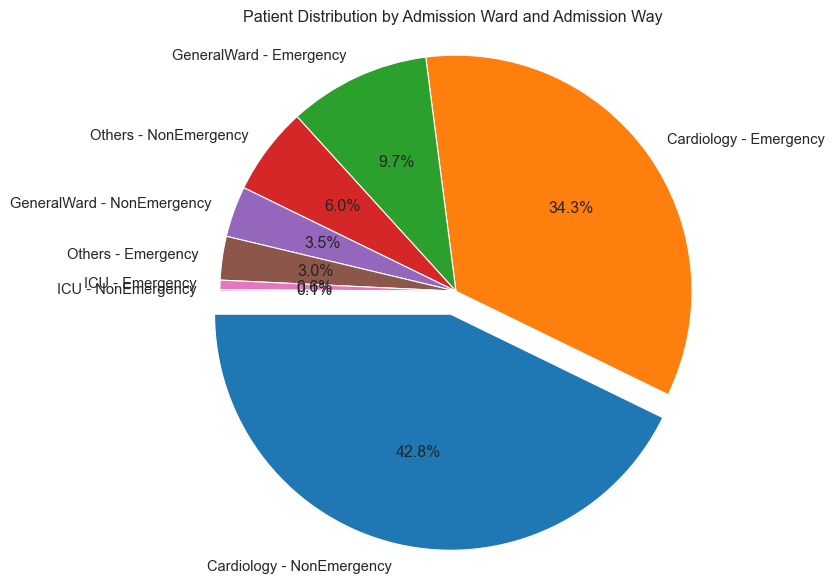

In [38]:
new_df1 = HosDis[['inpatient_number','admission_ward','admission_way']].copy()

new_df1['admission'] = new_df1['admission_ward'] + ' - ' + new_df1['admission_way']
#new_df.info()

new_df2 = new_df1['admission'].value_counts().reset_index()
new_df2.columns = ['admission', 'count']

largest_index = new_df2['count'].idxmax()

explode = [0.1 if i == largest_index else 0 for i in range(len(new_df2))]


plt.figure(figsize=(8, 6))
plt.pie(new_df2['count'], labels=new_df2['admission'], autopct='%1.1f%%', explode=explode, startangle=180)
plt.title('Patient Distribution by Admission Ward and Admission Way')
plt.axis('equal') 
plt.show()

33.Retrieve the row with minimum white_blood_cell count using sorting technique.

In [95]:
sort_labs = Labs.sort_values(by = 'white_blood_cell')

min_row = sort_labs.iloc[0]

print("Row with minimum white blodd cell count is ")
min_row

Row with minimum white blodd cell count is 


inpatient_number           746068.00
body_temperature               37.10
pulse                          71.00
respiration                    20.00
systolic_blood_pressure       130.00
                             ...    
partial_oxygen_pressure        95.00
oxyhemoglobin                  96.30
anion_gap                      16.80
free_calcium                    1.11
total_hemoglobin               94.00
Name: 865, Length: 107, dtype: float64

34.Get the last letter of discharge_department of patients using RegEX

In [97]:
HosDis['last_letter'] = HosDis['discharge_department'].str.extract(r'(\w)$')

print(HosDis['last_letter'])


0       y
1       y
2       y
3       y
4       y
       ..
2003    d
2004    d
2005    y
2006    y
2007    y
Name: last_letter, Length: 2008, dtype: object


35.find the way to reverse string for given input (eg: input : This hackathon is about cardiac outcomes: outcomes cardiac about is hackathon This)

In [87]:
user_sentence=input("Enter a sentence:")
words_sentence=user_sentence.split()
reversed_words=words_sentence[::-1]
reversed_sentence=' '.join(reversed_words)
print(reversed_sentence)

Enter a sentence:enter a word or a letter
letter a or word a enter


36.Use the QB style library to create any multidimensional arrays.Create a figure object called fig using plt.figure() **
** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
** Plot (x,y) on that axes and set the labels.

In [41]:
from qbstyles import mpl_style

Text(0.5, 1.0, 'Sample Plot')

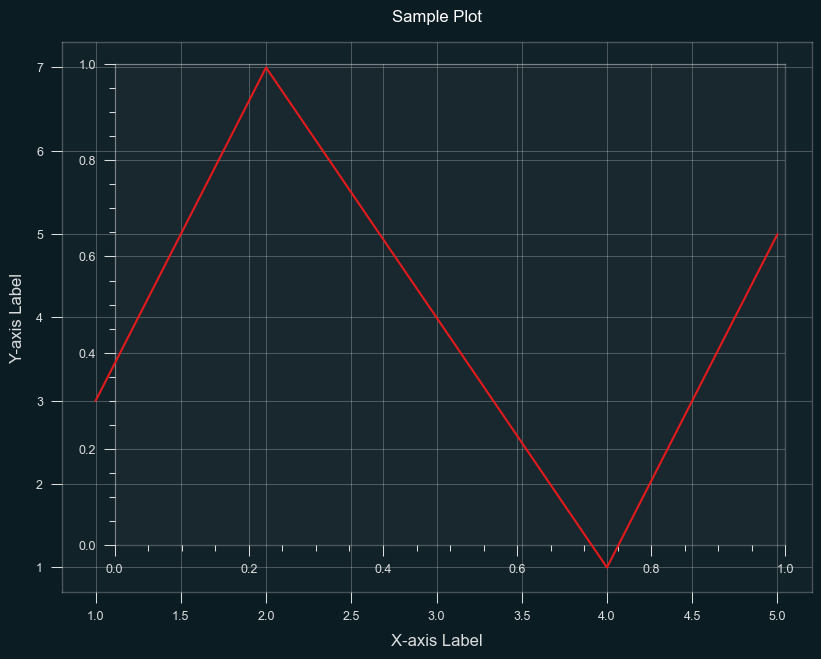

In [43]:
x = [1, 2, 3, 4, 5]
y = [3, 7, 4, 1, 5]


fig = plt.figure()


ax = fig.add_axes([0, 0, 1, 1]) 


ax.plot(x, y)


ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Sample Plot')



37.Using dischargeDay values print even if it even number and odd if it odd number

In [44]:
# Function to find Even/Odd number
def find_even_odd(day):
    if day % 2 == 0:
        return 'Even'
    else:
        return 'Odd'

# Adding the column 'Even-Odd' to updated DF and calling the 'find_even_odd' function
discharge_days_even_odd = (HosDis.loc[:, ['inpatient_number','dischargeDay']])
discharge_days_even_odd['Even-Odd'] = discharge_days_even_odd['dischargeDay'].apply(find_even_odd)

discharge_days_even_odd


inpatient_number  dischargeDay Even-Odd
0               857781            11      Odd
1               743087             8     Even
2               866418             5      Odd
3               775928            11      Odd
4               810128             5      Odd
...                ...           ...      ...
2003            740689             5      Odd
2004            734280             8     Even
2005            781004            14     Even
2006            744870             1      Odd
2007            791864             6     Even

[2008 rows x 3 columns]

38. find the length of Tuple for any given input (Hint: Input a string from user )

In [91]:
user_input = input("Enter a sentence:  ")
input_t = tuple(user_input.split())

length = len(input_t)
print("Length of the tuple:", length)

Enter a string:  hey hello there
Length of the tuple: 3


39.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

C:\Users\happy\AppData\Local\Temp\ipykernel_31984\3895050404.py:19: RuntimeWarning: divide by zero encountered in log
  ax.plot(x, np.log(np.arange(100)), 'g')   #np.log(np.arange(100))


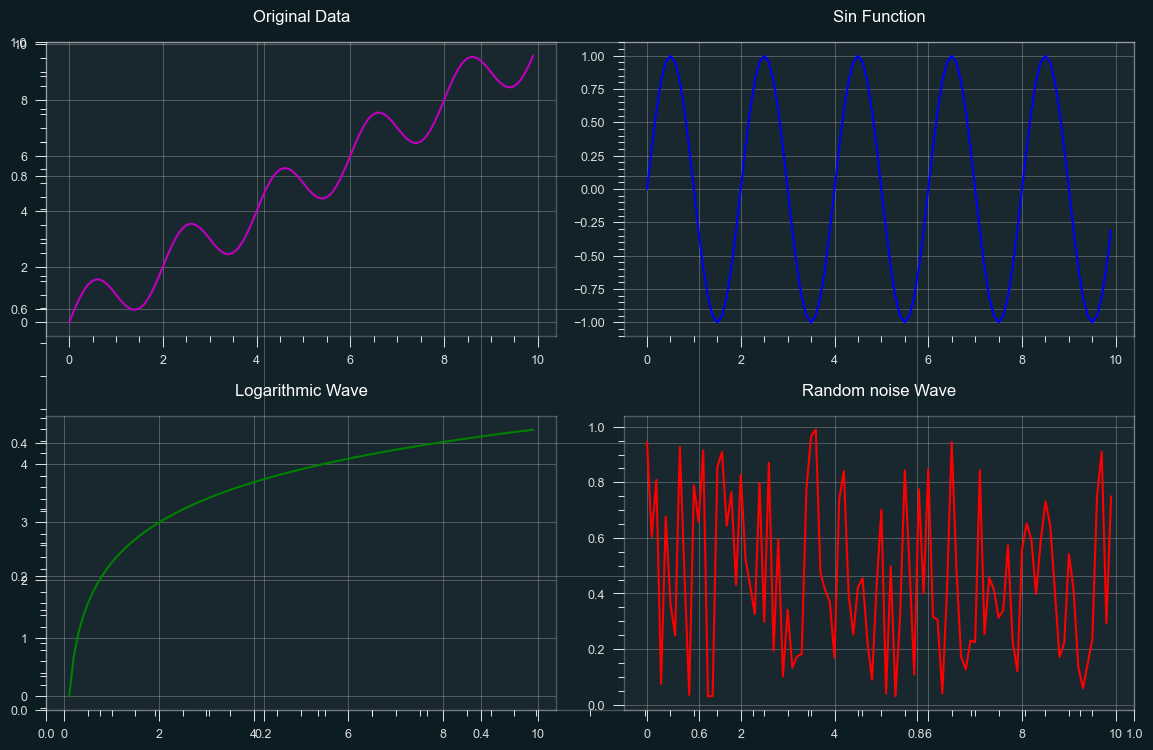

In [45]:
# create x and y  data
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# figure and axes objects
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# subplot
for i in range(2):
    for j in range(2):
        ax = axs[i, j]
        if i == 0 and j == 0:
            ax.plot(x, y, 'm') 
            ax.set_title('Original Data')
        elif i == 0 and j == 1:
            ax.plot(x, np.sin(np.pi * x), 'b')  
            ax.set_title('Sin Function')
        elif i == 1 and j == 0:
            ax.plot(x, np.log(np.arange(100)), 'g')   #np.log(np.arange(100)) 
            ax.set_title('Logarithmic Wave')
        elif i == 1 and j == 1:
            ax.plot(x, np.random.random(100), 'r') 
            ax.set_title('Random noise Wave')

plt.tight_layout()
plt.show()

40.Select 25 different random values between 200 to 800.

In [92]:
import random

ran_val = random.sample(range(200,801),25)

print("Sample of 25 random values between 200 to 800 : ", ran_val)

Sample of 25 random values between 200 to 800 :  [422, 447, 384, 290, 704, 427, 681, 735, 643, 288, 751, 660, 551, 505, 208, 777, 273, 485, 285, 698, 682, 563, 512, 295, 800]


41.Plot the time series of Admission dates with count of patients. The X-Axis should be for every 5 months

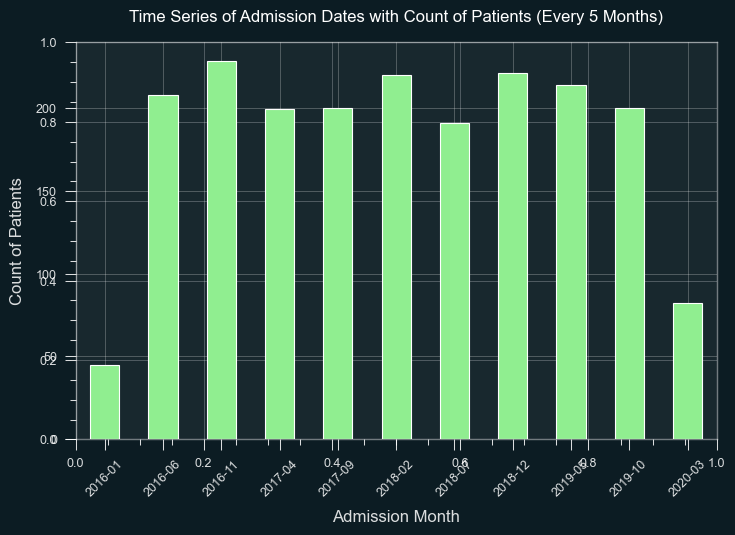

In [85]:
new_HosDis = HosDis.set_index('Admission_date').copy()
admi_data = new_HosDis['inpatient_number'].resample('5M').count()
admi_data.index = admi_data.index.strftime('%Y-%m')


admi_data.plot(kind='bar', color='lightgreen')
plt.xlabel('Admission Month')
plt.ylabel('Count of Patients')
plt.title('Time Series of Admission Dates with Count of Patients (Every 5 Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

42.np.arange(1,21).reshape(4,5), find array slicing to get the elements 1,2,8,19. 
When the value is less than 9, print as 0,else print 1

In [ ]:
### oneway >>>>                                                                                                                                                                                                          
a=np.arange(1,21).reshape(4,5)
display(a)
print(a[0,0])
print(a[0,1])
print(a[1,2])
print(a[3,3])     


##Otherway                                                                                                                                                                                                                                               
i = 0
for x in a:
    j = 0
    for y in x:
        if y==1 or y==2 or y==8 or y==19:
            print('index for element with required value is', i , j)
            print(a[i, j])
        j = j + 1
    i = i + 1 

43. Give Distribution chart of max Killip_grade

maximum value of Killip_grade is 2
counts of max Killip grade-2 is  1029


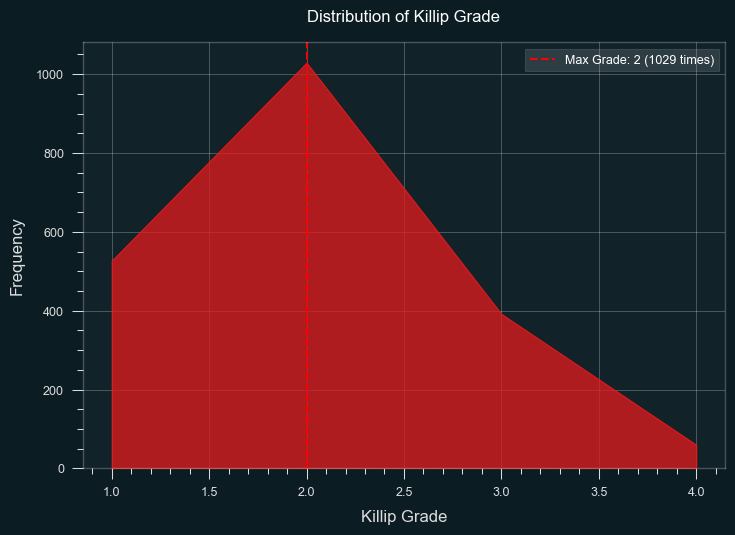

In [47]:
# Find the maximum count of Killip_grade
max_Killip_grade = CardiacComp['Killip_grade'].value_counts().idxmax()
max_Killip_grade_count = CardiacComp['Killip_grade'].value_counts().max()

print('maximum value of Killip_grade is', max_Killip_grade)
print('counts of max Killip grade-2 is ', max_Killip_grade_count)
# Plot graph of Killip_grade
sns.histplot(CardiacComp['Killip_grade'], kde=False, discrete=True, element="poly")
plt.axvline(x=max_Killip_grade, color='r', linestyle='--', label=f'Max Grade: {max_Killip_grade} ({max_Killip_grade_count} times)')
plt.xlabel('Killip Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Killip Grade')
plt.legend()
plt.show()


44. Based on Q26 and 27 display all demographic details of patients who are born in year 1945

In [48]:
# Filtering on Birth Year column
updated_Demog2.loc[updated_Demog2['Birth Year']== 1945]

inpatient_number  gender  weight  height        BMI     occupation  \
46              865365  Female    52.0    1.50  23.111111         farmer   
48              806646  Female    48.0    1.50  21.333333  UrbanResident   
58              794078    Male    65.0    1.65  23.875115  UrbanResident   
62              864678    Male    55.0    1.70  19.031142  UrbanResident   
63              859541  Female    42.0    1.48  19.174580  UrbanResident   
79              746924    Male    65.0    1.72  21.971336  UrbanResident   
134             747852  Female    49.0    1.50  21.777778         Others   
153             858901  Female    40.0    1.48  18.261505  UrbanResident   
317             869207  Female    47.5    1.40  24.234694  UrbanResident   
332             787764  Female    62.0    1.50  27.555556  UrbanResident   
335             785379    Male    48.0    1.48  21.913806  UrbanResident   
341             869987    Male    47.5    1.70  16.435986  UrbanResident   
398             868283    Male    42.0    1.55  17.481790         farmer   
430             770722  Female    45.0    1.60  17.578125  UrbanResident   
457             756996  Female    40.0    1.58  16.023073  UrbanResident   
511             809771    Male    42.0    1.60  16.406250  UrbanResident   
520             764091    Male    60.0    1.60  23.437500  UrbanResident   
540             730541  Female    55.0    1.58  22.031726  UrbanResident   
568             867530  Female    50.0    1.53  21.359306  UrbanResident   
600             740311    Male    74.0    1.70  25.605536  UrbanResident   
630             813580  Female    45.0    1.58  18.025957  UrbanResident   
646             793748    Male    66.0    1.68  23.384354  UrbanResident   
656             819424  Female    45.0    1.48  20.544193  UrbanResident   
714             806277  Female    40.0    1.52  17.313019  UrbanResident   
816             755244  Female    45.0    1.56  18.491124  UrbanResident   
867             815164  Female    45.0    1.45  21.403092            NaN   
916             865283  Female    40.0    1.55  16.649324  UrbanResident   
924             815148  Female    42.0    1.56  17.258383  UrbanResident   
1020            827673  Female    40.0    1.50  17.777778  UrbanResident   
1066            809447    Male    40.0    1.75  13.061224  UrbanResident   
1149            830727  Female    50.0    1.55  20.811655  UrbanResident   
1203            867235    Male    49.5    1.68  17.538265         Others   
1283            801575  Female    50.0    1.56  20.545694  UrbanResident   
1300            798882  Female    45.0    1.45  21.403092  UrbanResident   
1339            774652    Male    60.0    1.60  23.437500  UrbanResident   
1372            732244  Female    48.0    1.58  19.227688  UrbanResident   
1455            820402  Female    51.0    1.52  22.074100  UrbanResident   
1524            842218  Female    45.0    1.54  18.974532  UrbanResident   
1585            817574  Female    40.0    1.50  17.777778  UrbanResident   
1653            864584    Male    49.0    1.63  18.442546  UrbanResident   
1702            785477  Female    50.0    1.60  19.531250  UrbanResident   
1703            869257  Female    49.0    1.50  21.777778  UrbanResident   
1727            865501  Female    48.5    1.50  21.555556  UrbanResident   
1741            855080  Female    49.5    1.50  22.000000  UrbanResident   
1776            794527  Female    55.0    1.50  24.444444  UrbanResident   
1791            787726    Male    60.0    1.60  23.437500  UrbanResident   
1796            809897  Female    50.0    1.50  22.222222  UrbanResident   
1811            793116  Female    35.0    1.55  14.568158         farmer   
1823            797927    Male    65.0    1.67  23.306680  UrbanResident   
1825            861704  Female    49.5    1.50  22.000000  UrbanResident   
1846            854969  Female    35.0    1.40  17.857143  UrbanResident   
1941            865447    Male    49.0    1.60  19.140

45. Create a dataframe with date and time as columns, where the values are the admission time

In [49]:
# create admission_time data
admission_time_data = [
    "2023-05-09 02:30:00",
    "2022-05-23 04:15:00",
    "2021-05-12 08:00:00",
    "2023-05-06 11:45:00",
    "2022-05-18 10:30:00"
]

# Create Admission_Time dataframe
Admission_Time_df = pd.DataFrame({'Admission_Time': admission_time_data})

Admission_Time_df['Admission_Time'] = pd.to_datetime(Admission_Time_df['Admission_Time'])

# Getting and placing date and time into separate columns
Admission_Time_df['Date'] = Admission_Time_df['Admission_Time'].dt.date
Admission_Time_df['Time'] = Admission_Time_df['Admission_Time'].dt.time

# drop addmission_time column
Admission_Time_df = Admission_Time_df.drop(columns=['Admission_Time'])

print(Admission_Time_df)

         Date      Time
0  2023-05-09  02:30:00
1  2022-05-23  04:15:00
2  2021-05-12  08:00:00
3  2023-05-06  11:45:00
4  2022-05-18  10:30:00


46. Convert occupation into numeric by Label encoding

In [50]:
# Import label encoder 
from sklearn import preprocessing 

label_encoded_demog=Demog
label_encoder = preprocessing.LabelEncoder()
label_encoded_demog['occupation'].unique()
label_encoded_demog['occupation']= label_encoder.fit_transform(label_encoded_demog['occupation'])

label_encoded_demog

inpatient_number  gender  weight  height        BMI  occupation ageCat  \
0               857781    Male    50.0    1.64  18.590125           2  69-79   
1               743087  Female    51.0    1.63  19.195303           2  69-79   
2               866418    Male    70.0    1.70  24.221453           3  59-69   
3               775928    Male    65.0    1.70  22.491349           2  69-79   
4               810128  Female    76.0    1.55  31.633715           2  69-79   
...                ...     ...     ...     ...        ...         ...    ...   
2003            740689  Female    35.0    1.50  15.555556           1  79-89   
2004            734280  Female    50.0    1.55  20.811655           2  79-89   
2005            781004    Male    75.0    1.70  25.951557           2  39-49   
2006            744870    Male    40.0    1.50  17.777778           2  49-59   
2007            791864  Female    45.0    1.55  18.730489           2  79-89   

      Age  Birth Year  
0      69        1955  
1      73        1951  
2      60        1964  
3      77        1947  
4      75        1949  
...   ...         ...  
2003   83        1941  
2004   86        1938  
2005   44        1980  
2006   55        1969  
2007   84        1940  

[2008 rows x 9 columns]

47. Generate a 3x3 Array using Random values between 1to 9 and Fix the values and position in Next Run.

In [51]:
# Generate a 3x3 Array using Random values between 1to 9
random_array = np.random.randint(1, 10, size=(3, 3))

print("Random Array:")
print(random_array)

# Save the random array for future runs
np.save("random_array.npy", random_array)

Random Array:
[[5 7 4]
 [1 1 5]
 [5 9 2]]


In [52]:
# Fix the values and position of 3x3 Array 'random_array' in Next Run
random_array = np.load("random_array.npy")
print(random_array)

[[5 7 4]
 [1 1 5]
 [5 9 2]]


48. Using loops, create a multiplication table for the number 7

In [53]:
n=7
for i in range(1,11):
    print(n,"*",i,"=",n*i)

7 * 1 = 7
7 * 2 = 14
7 * 3 = 21
7 * 4 = 28
7 * 5 = 35
7 * 6 = 42
7 * 7 = 49
7 * 8 = 56
7 * 9 = 63
7 * 10 = 70


49. Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)

In [ ]:
import psycopg2
conn=psycopg2.connect(database='Pythonhackathon',user='postgres',password="123",
                 host='localhost',port=5432)

cursor = conn.cursor()
#cursor.execute('select * from public."Demographics" where gender=\'Male\'')
cursor.execute('select inpatient_number, gender from public."Demographics" where gender=\'Male\'')

result = cursor.fetchall()
result= pd.DataFrame(result)
result.columns=['inpatient_number', 'gender']
print(result)

50.Display the lab details of the patient with maximum pulse using the .loc

In [54]:

#display(Labs)
max_pulse = Labs['pulse'].max()
max_pulse_patient = Labs.loc[Labs['pulse'] == max_pulse]
print('maximum pulse:', max_pulse)
print('lab details of maximum pulse patient is:', max_pulse_patient)

maximum pulse: 198
lab details of maximum pulse patient is:      inpatient_number  body_temperature  pulse  respiration  \
457            756996              36.0    198           19   

     systolic_blood_pressure  diastolic_blood_pressure   map  fio2  \
457                      105                        69  81.0    33   

     creatinine_enzymatic_method  urea  ...  measured_residual_base  \
457                         64.3  4.78  ...                     1.7   

     measured_bicarbonate  carboxyhemoglobin  body_temperature_blood_gas  \
457                  24.8                0.8                        37.0   

     oxygen_saturation  partial_oxygen_pressure  oxyhemoglobin  anion_gap  \
457               98.0                    125.0           97.6       12.5   

     free_calcium  total_hemoglobin  
457          1.07             132.0  

[1 rows x 107 columns]


51. Display a violin chart to show distribution of Pulse Rate against age.

<Axes: xlabel='ageCat', ylabel='pulse'>

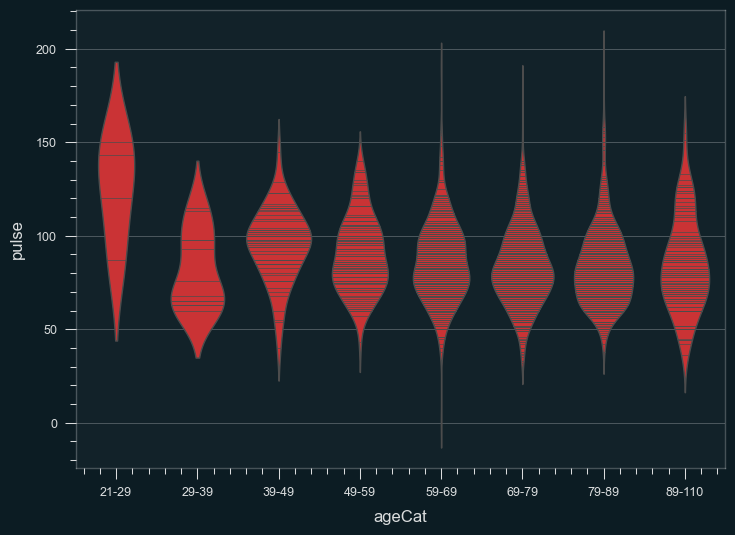

In [55]:
#concating both labs and Demography
Labs = pd.read_excel(excelFile, 'Labs')
Demog = pd.read_excel(excelFile, 'Demography')
df_violin = pd.concat([Labs['pulse'], Demog['ageCat']], axis=1)
#display(df_violin)
df_violin = df_violin.sort_values(['ageCat']).reset_index(drop=True)
#display(df_violin)
sns.violinplot(x = 'ageCat', y = "pulse", data = df_violin, inner="stick")

52. Create a Point Plot on Age against time to readmission.

<Axes: xlabel='ageCat', ylabel='readmission_time_days_from_admission'>

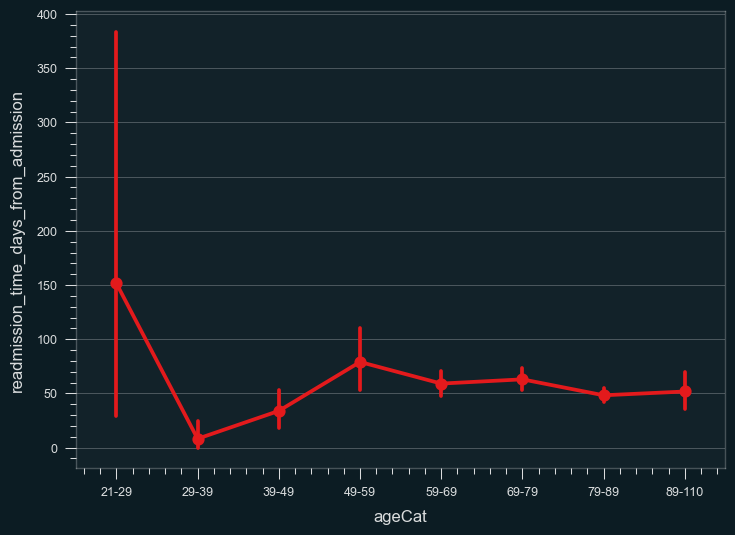

In [56]:
#concating both Hospitalization discharge and Demography

df_concat= pd.concat([HosDis['readmission_time_days_from_admission'], Demog['ageCat']], axis=1)
df_concat['readmission_time_days_from_admission']=df_concat['readmission_time_days_from_admission'].fillna(0)
df_concat=df_concat.sort_values(['ageCat']).reset_index(drop=True)

sns.pointplot(x = "ageCat", 
              y = "readmission_time_days_from_admission", 
              data = df_concat) 

53. What is the correlation between CCI score and outcome?

The correlation between CCI score and outcome is
                                outcome_during_hospitalization  CCI_score
outcome_during_hospitalization                        1.000000   0.093843
CCI_score                                             0.093843   1.000000
Based on correlation output, CCi score and outcome are least correlated 


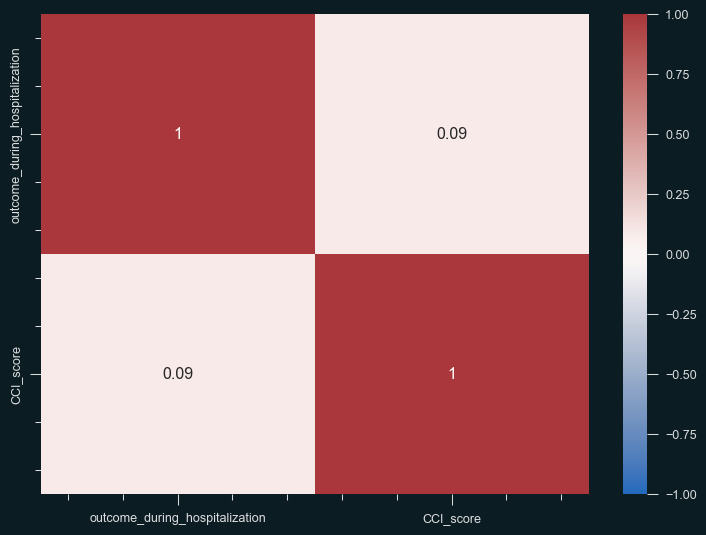

In [57]:
#concat patienthistory and hospitailaization discharge

df_corr=pd.concat([HosDis['outcome_during_hospitalization'],PaHi['CCI_score']], axis=1)
df_corr.dropna(inplace=True)
df_corr['outcome_during_hospitalization']=df_corr['outcome_during_hospitalization'].astype('category').cat.codes
correlation=df_corr.corr()
print('The correlation between CCI score and outcome is')
print(correlation)
print('Based on correlation output, CCi score and outcome are least correlated ')

import seaborn as sns
#df_c=sns.load_dataset('df_corr['outcome_during_hospitalization']')
matrix=correlation.round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()


54. For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i

In [58]:
i= [0,1,2,6,8]
lst=[]
for b in i:
    if b%2==0:
        lst.append(b)
    continue
#print(lst)
ia=pd.array(lst)
ia_new=ia*ia
print('after multiplication of even numbers', ia_new)
#zero is even number as, it is an integer multiple of 2. 

after multiplication of even numbers <IntegerArray>
[0, 4, 36, 64]
Length: 4, dtype: Int64


55. Create a jointplot on diastolic_blood_pressure & length of stay

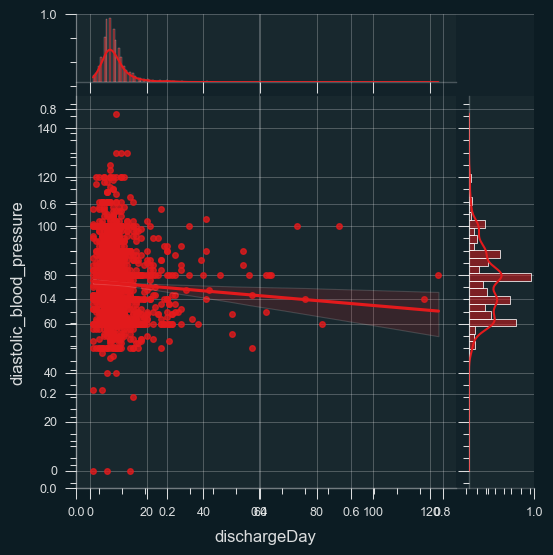

In [59]:
#length of stay is same as discharge day from Hospitalization_discharge sheet,
#as in this sheet we have date of arrival but not of discharge,
#whose difference would give us length of stay,so assumed length of stay is same as discharge day.

import warnings
warnings.simplefilter('ignore', category=FutureWarning)

#length of stay is from Hospitalization discharge and diastolic blood pressure is from labs

new_df=pd.merge(HosDis, Labs, on= 'inpatient_number', how='inner')
#display(new_df[['dischargeDay', 'diastolic_blood_pressure', 'inpatient_number']])
new_df_joinplt=new_df[['dischargeDay', 'diastolic_blood_pressure']]
#display(new_df_joinplt)
sort_new_df=new_df_joinplt.sort_values(by='dischargeDay', ascending=True)
#display(sort_new_df)

sns.jointplot(x='dischargeDay', y='diastolic_blood_pressure', data=sort_new_df, kind='reg', space=0.2, dropna='True')
plt.show()


56. Using loc, retrieve the agegroup and weight between indices 101 and 201.

In [60]:
#display(Demog)

indices=Demog.loc[101:201, ['inpatient_number','weight','ageCat']]
print('The agegroup and weight between indices 101 and 201 is')
print(indices)
#display(indices)


The agegroup and weight between indices 101 and 201 is
     inpatient_number  weight  ageCat
101            817948    41.0   69-79
102            797752    64.0   79-89
103            828763    61.0   79-89
104            747856    40.0   79-89
105            866380    73.0   69-79
..                ...     ...     ...
197            743061    50.0   79-89
198            729509    50.0  89-110
199            813738    50.0   69-79
200            801411    63.0   59-69
201            736771    60.0   69-79

[101 rows x 3 columns]


57. Create a pivot table show shows outcome type as rows, the admission_ward as columns and counts of patients in each category as values

In [61]:
#used HospitalizationDischarge

dfforPivot = pd.read_excel('Cardiac_Outcomes.xlsx', 'Hospitalization_Discharge')
pivot = pd.pivot_table(HosDis, index=['outcome_during_hospitalization'],
                               columns=['admission_ward'], 
                               values=['inpatient_number'],
                               aggfunc='count')
pivot

inpatient_number                       
admission_ward                       Cardiology GeneralWard ICU Others
outcome_during_hospitalization                                        
Alive                                      1472         238  12    168
Dead                                          8           1   1      1
DischargeAgainstOrder                        67          26   2     12

58. Use Hexagonal binning to show the density of patients who were readmitted when compared to Discharge Days

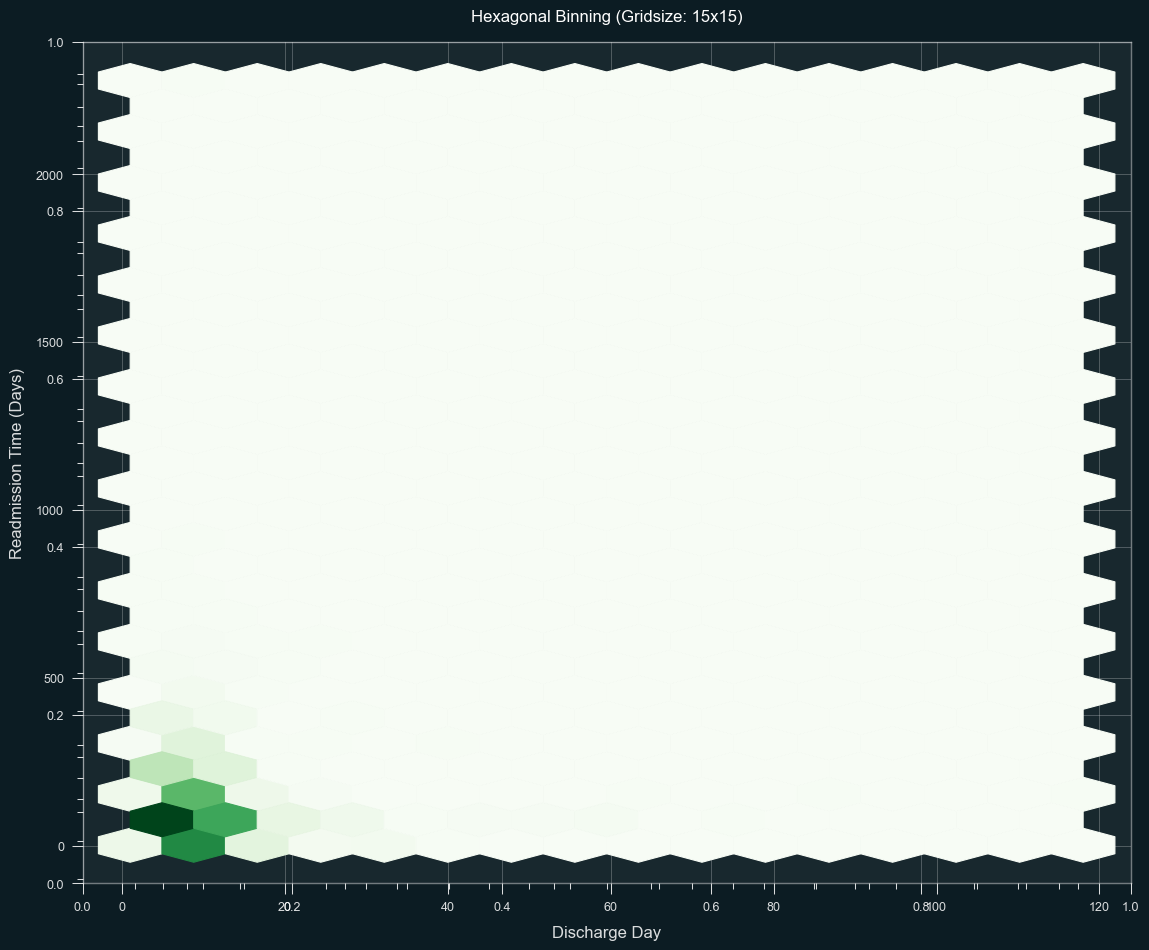

In [62]:

dfforHexa=HosDis.copy()
fig, ax = plt.subplots(figsize=(12, 10))
ax.hexbin(dfforHexa['dischargeDay'], dfforHexa['readmission_time_days_from_admission'], gridsize=(15,15), cmap='Greens')
ax.set_title('Hexagonal Binning (Gridsize: 15x15)')
ax.set_xlabel('Discharge Day')
ax.set_ylabel('Readmission Time (Days)')
plt.tight_layout()
plt.show()

59. Using Sunburst chart display patients Age group, occupation and BMI Group

In [4]:
import plotly.express as px 
#demography has this subcriteria 

#actual showing sunburst charts with patients agegroup, oocupation, BMI group
Demog = pd.read_excel(excelFile, 'Demography')
df_demog = pd.read_excel('Cardiac_Outcomes.xlsx', 'Demography')
df_demog.head()
#display(df_demog)

#NA meaning null values are there in occupation, therefore used below function
Demog['occupation']=Demog['occupation'].fillna ('None')
fig = px.sunburst(Demog, path=['occupation',
                                  'ageCat', 
                                  'BMI'],
                                   values='BMI')
fig.show()

60. Plot the Density Chart for visit times

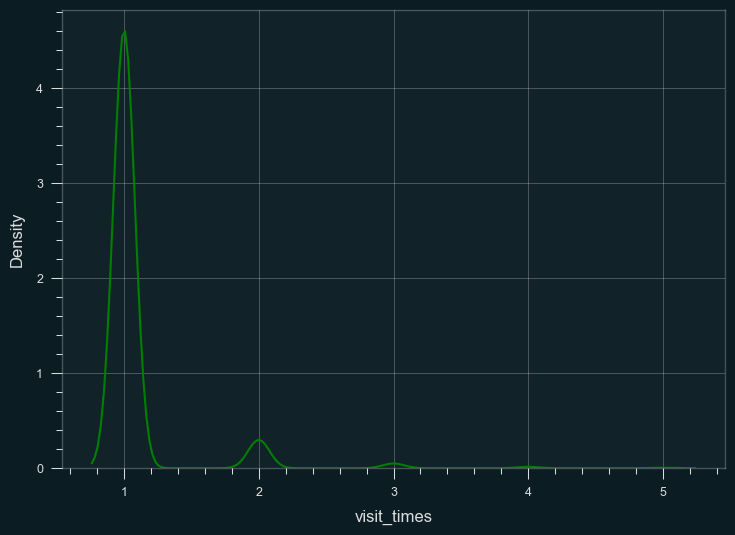

In [64]:
import warnings
warnings.simplefilter('ignore', category=UserWarning)
#Hospitalizationdischarge is utilized here
HosDis = pd.read_excel(excelFile, 'Hospitalization_Discharge')
HosDis.head()
sns.distplot(a=HosDis.visit_times, color='green', hist=False)
plt.show()

61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [65]:
a=np.arange(1,31).reshape(6,5)
#display(a)
#in below ways it can be represented.
print(a[2,0])
print(a[2,1])
print(a[3,0])
print(a[3,1])
print(a[2,0:2])
print(a[3,0:2])
#another way of slicing also, this way shows index
i = 0
for x in a:
    j = 0
    for y in x:       
        if y==11 or y==12 or y==16 or y==17:
            print('index for element with required value is', i , j)           
            print(a[i, j])
        j = j + 1
    i = i + 1


11
12
16
17
[11 12]
[16 17]
index for element with required value is 2 0
11
index for element with required value is 2 1
12
index for element with required value is 3 0
16
index for element with required value is 3 1
17


62. What % of all patients with an outcome of "Alive" died within 28 days. What was the mean platelet volume among this group?

In [66]:
#taken 'Hospitalization_Discharge'
df_alive=HosDis.loc[(HosDis['outcome_during_hospitalization']=='Alive')]
outcome_during_hospitaliztn=(len(df_alive))
print('The patients with outcome_during_hospitalization who are alive is :', outcome_during_hospitaliztn)
df_alive_within28days=HosDis.loc[(HosDis['outcome_during_hospitalization']=='Alive') & (HosDis['death_within_28_days'] == 1)]
#display(df_alive_within28days)
df_alive_within28day=(len(df_alive_within28days))
print('The patients who are alive_within 28days is :', df_alive_within28day)
patients_alive=round((len(df_alive_within28days)/len(df_alive))*100, 2)
print('The % of all patients with an outcome of "Alive" died within 28 days :', patients_alive)

#taken 'Labs' 

dfData = pd.concat([df_alive_within28days['inpatient_number'], df_alive_within28days['outcome_during_hospitalization'], df_alive_within28days['death_within_28_days'], Labs['mean_platelet_volume']], axis=1)
dfData.dropna(inplace=True)
print('Below is the table of patients having an outcome of "Alive" died within 28 days and their meanplatelet volume')
display(dfData)
mean_meanplateletvolume = round(dfData['mean_platelet_volume'].mean(), 2)
print('The average of plateletvolume of all patients with an outcome of "Alive" died within 28 days is', mean_meanplateletvolume)


The patients with outcome_during_hospitalization who are alive is : 1890
The patients who are alive_within 28days is : 8
The % of all patients with an outcome of "Alive" died within 28 days : 0.42
Below is the table of patients having an outcome of "Alive" died within 28 days and their meanplatelet volume


inpatient_number outcome_during_hospitalization  death_within_28_days  \
43            798240.0                          Alive                   1.0   
74            733308.0                          Alive                   1.0   
94            777721.0                          Alive                   1.0   
140           860325.0                          Alive                   1.0   
398           868283.0                          Alive                   1.0   
505           833564.0                          Alive                   1.0   
569           730165.0                          Alive                   1.0   
1339          774652.0                          Alive                   1.0   

      mean_platelet_volume  
43                    12.4  
74                    14.3  
94                    11.9  
140                   12.8  
398                   13.4  
505                   10.4  
569                   11.3  
1339                  14.3

The average of plateletvolume of all patients with an outcome of "Alive" died within 28 days is 12.6


63. find the patients who have 'h' in their DestinationDischarge and print them

In [67]:
HosDis = pd.read_excel(excelFile, 'Hospitalization_Discharge')
hd=pd.DataFrame(HosDis)
filtered_patients= hd.loc[hd['DestinationDischarge'].str.contains('h', case=False), 'inpatient_number']
print('patients who have "h" in their DestinationDischarge:')
print(filtered_patients)
  

patients who have "h" in their DestinationDischarge:
0       857781
1       743087
2       866418
3       775928
4       810128
         ...  
2002    754589
2003    740689
2004    734280
2005    781004
2007    791864
Name: inpatient_number, Length: 1782, dtype: int64


64. Create a grouped bar chart that shows number of patients by gender and ageCat

gender  ageCat  inpatient_number
0   Female   21-29                 3
1   Female   29-39                 5
2   Female   39-49                18
3   Female   49-59                51
4   Female   59-69               190
5   Female   69-79               421
6   Female   79-89               409
7   Female  89-110                66
8     Male   21-29                 1
9     Male   29-39                 7
10    Male   39-49                38
11    Male   49-59                55
12    Male   59-69               178
13    Male   69-79               294
14    Male   79-89               237
15    Male  89-110                35

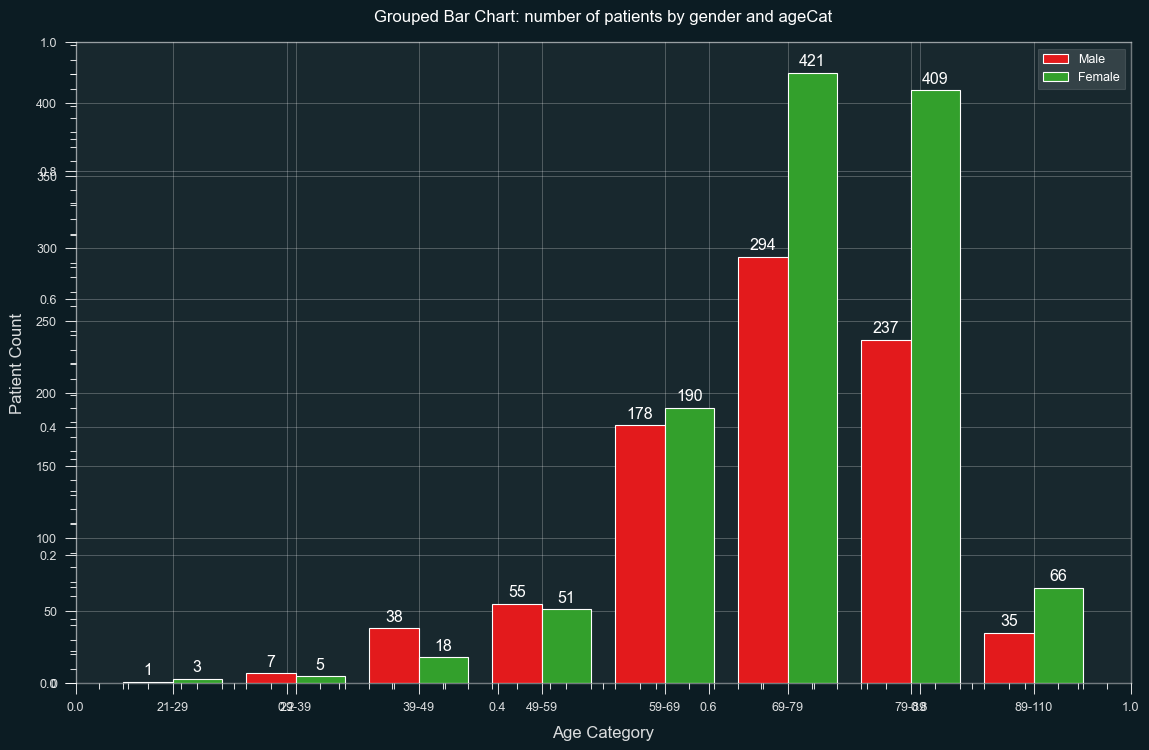

In [68]:
new = Demog.groupby(['gender',
        'ageCat'])['inpatient_number'].agg('count').reset_index()
display(new)
new1 = Demog.groupby(['gender',
        'ageCat'])['inpatient_number'].agg('count')
#display(new1)

x= np.arange(len(new["ageCat"].unique()))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(12, 8))
b1 = ax.bar(x, new.loc[new['gender'] == 'Male', 'inpatient_number'], width=bar_width, label='Male')
b2 = ax.bar(x + bar_width, new.loc[new['gender'] == 'Female', 'inpatient_number'], width=bar_width, label='Female')
ax.bar_label(b1, padding=3)
ax.bar_label(b2, padding=3)

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(new['ageCat'].unique())
ax.set_xlabel('Age Category')
ax.set_ylabel('Patient Count')
ax.set_title('Grouped Bar Chart: number of patients by gender and ageCat')
ax.legend()

plt.show()

65. Which Admission Ward has maximum number of visits scheduled    

In [69]:
#result = HosDis.groupby('admission_ward')['inpatient_number'].nunique()
#print(result.head(1))

print('Admission Ward that has maximum number of visits:')
(HosDis.groupby('admission_ward')['inpatient_number'].agg(['nunique'])).head(1)

Admission Ward that has maximum number of visits:


nunique
admission_ward         
Cardiology         1547

66. Display total count of patients in each discharge_department based on gender

In [70]:
# Merge Hospitalization_Discharge and Demography
dfNew = HosDis.merge(Demog[['inpatient_number','gender']], on ='inpatient_number')

print('Total count of patients in each discharge_department based on gender')
#dfNew.groupby(['discharge_department', 'gender'])['inpatient_number'].agg(['nunique'])
dfNew.groupby(['gender', 'discharge_department'])['inpatient_number'].agg(['nunique'])


Total count of patients in each discharge_department based on gender


nunique
gender discharge_department         
Female Cardiology                993
       GeneralWard               137
       ICU                         5
       Others                     28
Male   Cardiology                710
       GeneralWard               104
       ICU                         7
       Others                     24

67. How many Unique patients were precribed each type of medication?

In [71]:
# Using 'Patient_Precriptions' sheet and Unique 'inpatient_number'
print('Unique patients Count by Prescribed medication:')
PatPre.groupby('Drug_name')['inpatient_number'].agg(['nunique'])

Unique patients Count by Prescribed medication:


nunique
Drug_name                                                
Aspirin enteric-coated tablet                         958
Atorvastatin calcium tablet                           822
Benazepril hydrochloride tablet                       434
Clopidogrel Hydrogen Sulphate tablet                  401
Deslanoside injection                                1017
Digoxin tablet                                        999
Dobutamine hydrochloride injection                     22
Enoxaparin Sodium injection                           113
Furosemide injection                                 1720
Furosemide tablet                                    1641
Heparin Sodium injection                              153
Hydrochlorothiazide tablet                            283
Isoprenaline Hydrochloride injection                   30
Isosorbide Mononitrate Sustained Release tablet       326
Meglumine Adenosine Cyclophosphate for injection     1115
Metoprolol Succinate Sustained-release tablet         523
Milrinone injection                                   709
Nitroglycerin injection                               203
Shenfu injection                                      338
Spironolactone tablet                                1833
Torasemide tablet                                     252
Valsartan Dispersible tablet                          348
metoprolol tartrate injection                         307
sulfotanshinone sodium injection                      570
warfarin sodium tablet                                253

68. Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [72]:
# (HosDis.loc[(HosDis['dischargeDay'] >20)]).head(5)
high_discharge_days_df = (HosDis.loc[:, ['inpatient_number','dischargeDay','outcome_during_hospitalization']]).sort_values('dischargeDay' , ascending=False)

print(' Top 5 patients with the highest Discharge days :')
(high_discharge_days_df.loc[(HosDis['dischargeDay'] >20)]).head(5)

 Top 5 patients with the highest Discharge days :


inpatient_number  dischargeDay outcome_during_hospitalization
884             794077           123                          Alive
1613            768711           118                          Alive
1548            791880            88                          Alive
1573            794784            82                          Alive
1513            757711            76                          Alive

69. Get the list of patient ID's which are not there in prescriptions but in demographics

In [73]:
# Merge of Demography & Patient_Precriptions dataframes and using indicator= true and '_merge' column to find only left df rows that is not present in right df 

df_dem=pd.merge(Demog,PatPre,on=['inpatient_number'],how="outer",indicator=True)
df_dem=df_dem[df_dem['_merge']=='left_only']

df_dem_pts = pd. DataFrame() 
df_dem_pts['Patient ID'] = df_dem['inpatient_number']

# Create a styled representation of the DataFrame without index
styled_df_dem = df_dem_pts.style.hide()

# Print the styled DataFrame

print('Note: In Data there is only 1 Patient ID which is not there in prescriptions but in demographics: ')
print()
print('List of Patient IDs which are not there in prescriptions but in demographics: ')
styled_df_dem 

Note: In Data there is only 1 Patient ID which is not there in prescriptions but in demographics: 

List of Patient IDs which are not there in prescriptions but in demographics: 


70. On average, what is the most frequent weekday of admission?

In [74]:
# Coverting Addmission Date from DateFormat to Days

date_df = pd. DataFrame() 

date_df['Patients'] = HosDis['inpatient_number']
date_df['add_date'] = pd.to_datetime(HosDis['Admission_date']) 
date_df['DayOfWeek'] = date_df['add_date'].dt.day_name() 

#date_df.groupby('dayOfWeek').agg(['count'])

# Calculating distint count of patients admmited by Days and Sorting in decending order

addmission_days = date_df.groupby('DayOfWeek')['Patients'].nunique().reset_index()
addmission_days_sorted = addmission_days.sort_values(by='Patients',  ascending=False).reset_index()

# Getting most frequent weekday of admission

Most_frequent_weekday_of_Addmission = addmission_days_sorted.iloc[0]['DayOfWeek']
No_of_patients_admitted =  addmission_days_sorted.iloc[0]['Patients']
print(' Most frequent weekday of admission : '+ Most_frequent_weekday_of_Addmission)
print(' No of patients admitted : ' +  str(No_of_patients_admitted))


 Most frequent weekday of admission : Monday
 No of patients admitted : 308


71. Which year had the maximum admissions

In [75]:
# Coverting Addmission Date from DateFormat to Year

date_df_new = pd. DataFrame() 
date_df_new['Patients'] = HosDis['inpatient_number']
date_df_new['adm_date'] = pd.to_datetime(HosDis['Admission_date']) 
date_df_new['adm_year'] = pd.DatetimeIndex(date_df_new['adm_date']).year

# Calculating distint count of patients admmited by Year and Sorting in decending order

admit_years = date_df_new.groupby('adm_year')['Patients'].nunique().reset_index()
admit_years_sorted = admit_years.sort_values(by='Patients',  ascending=False).reset_index()

# Getting Year with maximum number of admissions.

year_with_maximum_admisions = admit_years_sorted.iloc[0]['adm_year']
No_of_patients_admitted_year =  admit_years_sorted.iloc[0]['Patients']
print(' Year with Maximum Admissions : '+ str(year_with_maximum_admisions))
print(' No of patients Admitted : ' +  str(No_of_patients_admitted_year))

#date_df_new.groupby('adm_year').agg(['count'])

 Year with Maximum Admissions : 2016
 No of patients Admitted : 518


72. What % of the dataset is male vs female?

In [76]:
#Demog.groupby('gender')['inpatient_number'].nunique().reset_index()

gendre_df = pd. DataFrame() 
gendre_df = Demog.groupby('gender')['inpatient_number'].nunique().reset_index()

gendre_df['Percent %'] = round((gendre_df['inpatient_number'] /
                        gendre_df['inpatient_number'].sum()) * 100 , 2)

gendre_df.rename(columns={'inpatient_number':'Patients Count'},inplace= True) 

gendre_df


gender  Patients Count  Percent %
0  Female            1163      57.92
1    Male             845      42.08

73. Which patient in the youngest age category weighs the most?

In [77]:
# Fiding the Youngest age Patients 
rslt_df = Demog[Demog['ageCat'] == '21-29'] 
#print('\nResult dataframe :\n', rslt_df)

# Sorting the resultset in decending order and Finding the Heighest Weight Patient
Sorted_rs = rslt_df.sort_values(by='weight',  ascending=False).reset_index()
young_pt = Sorted_rs.iloc[0]['inpatient_number']
yount_pt_wt = Sorted_rs.iloc[0]['weight']

print('Patient in youngest category(21-29) with Highest weight is : ' +  str(young_pt))
print('Weight is : ' +  str(yount_pt_wt))

#maxWeight = rslt_df['weight'].max()
#print(maxWeight)


Patient in youngest category(21-29) with Highest weight is : 831184
Weight is : 82.5


74. Which adm ward had the lowest rate of Outcome Death?

In [78]:
# Percentage calculation function

def calc_percent(num1, total):
    return (num1/total)*100

# Filtering Patients having Outcome "Dead".
pt_outcome_death_df = HosDis[HosDis['outcome_during_hospitalization'] == 'Dead']

total_no_of_pt_dead = len(pt_outcome_death_df)

# Using GroupBy to Group patients by Admit ward and then sorting to find the adm ward with lowest rate of Outcome Death

adm_out_pt_df = pt_outcome_death_df.groupby('admission_ward')['inpatient_number'].nunique().reset_index()

adm_out_pt_df['Rate of Death % '] = round(calc_percent(adm_out_pt_df['inpatient_number'],total_no_of_pt_dead ), 2)

adm_out_pt_df_sorted = adm_out_pt_df.sort_values(by='inpatient_number',  ascending=True).reset_index()

adm_out_pt_df_sorted.rename(columns={'inpatient_number':'Patients Count'},inplace= True) 

print('After Analysing the Data, 3 Admission ward had lowest rate of Outcome Death.')
adm_out_pt_df_sorted

After Analysing the Data, 3 Admission ward had lowest rate of Outcome Death.


index admission_ward  Patients Count  Rate of Death % 
0      1    GeneralWard               1              9.09
1      2            ICU               1              9.09
2      3         Others               1              9.09
3      0     Cardiology               8             72.73

75. What % of those with an outcome of death, had myocardial infarction?

In [79]:
# Filtering Patients having Outcome "Dead".
pt_outcome_death_df = HosDis[HosDis['outcome_during_hospitalization'] == 'Dead']
total_pt_outcome_death = len(pt_outcome_death_df)

# Filter patients having Mayocardial Infarction and Outcome of Death
cardiac_death_pt1 = pt_outcome_death_df.merge(CardiacComp[['inpatient_number', 'myocardial_infarction']], on ='inpatient_number')
cardiac_death_pt1_filtered = cardiac_death_pt1[cardiac_death_pt1['myocardial_infarction'] == 1 ]

no_pt_with_myocard = len(cardiac_death_pt1_filtered)

# Calculate percentage 
pt_percent_result = calc_percent(no_pt_with_myocard, total_pt_outcome_death)

print('% of Patients with an outcome of death that had Myocardial Infarction is: ' + str(round(pt_percent_result, 2)) + ' %')



% of Patients with an outcome of death that had Myocardial Infarction is: 9.09 %


76. What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [80]:

# Filtering Patients having congestive heart failure.
pt_congestive_heart_failure = CardiacComp[CardiacComp['congestive_heart_failure'] == 1]
pt_congestive_heart_failure_ct = len(pt_congestive_heart_failure)

# Filtering Patients having type of heart failure as 'Both'
pt_type_if_ht_fail_both = CardiacComp[CardiacComp['type_of_heart_failure'] == 'Both']
pt_type_if_ht_fail_both_ct = len(pt_type_if_ht_fail_both)

ratio = pt_congestive_heart_failure_ct/pt_type_if_ht_fail_both_ct

print('Patients with congestive heart failure : ' + str(pt_congestive_heart_failure_ct))
print('Patients with type of heart failure as Both : ' + str(pt_type_if_ht_fail_both_ct))
      
print('Ratio of those with congestive heart failure to those who had type of heart failure as Both : ' + str(round(ratio, 2)))

Patients with congestive heart failure : 1872
Patients with type of heart failure as Both : 1480
Ratio of those with congestive heart failure to those who had type of heart failure as Both : 1.26


77. LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death)

In [81]:
# The relationship between the GCS Score and outcome l is the basis for a common classification of acute traumatic brain injury: 
# Severe: GCS 3 to 8 , Moderate GCS 9 to 12,  Mild: GCS 13 to 15.

# Find the patients with severe GCS Score.
pt_wt_severe_gcs = Respons[Respons['GCS'] <=8] 

# Cardiogenic shock patients 
pt_wt_cardiogenic_shock  = CardiacComp[CardiacComp['Killip_grade'] == 4 ] 

# Merge dataframes with Hospitalization_Discharge
pt_hosp_wt_severe_gcs = pd.merge(HosDis, pt_wt_severe_gcs[['inpatient_number','GCS']],on='inpatient_number', how='inner')

pt_hosp_wt_severe_gcs_card_shock = pd.merge(pt_hosp_wt_severe_gcs, pt_wt_cardiogenic_shock[['inpatient_number','Killip_grade']],on='inpatient_number', how='inner')

pt_hosp_wt_severe_gcs_card_shock_grp = pt_hosp_wt_severe_gcs_card_shock.groupby('outcome_during_hospitalization')['inpatient_number'].nunique().reset_index()

pt_hosp_wt_severe_gcs_card_shock_grp.rename(columns={'inpatient_number':'Patients Count'},inplace= True) 
pt_hosp_wt_severe_gcs_card_shock_grp.rename(columns={'outcome_during_hospitalization':'Outcome During Hospitalization'},inplace= True) 

print('Severe GCS Score : 3 to 8 ')
print('Cardiogenic shock is when "Killip_grade" = 4 ')
print()
print('Number of Cardiogenic shock patients based on Hospitalization Outcome, having a severe GCS score(higher risk of death) :')
pt_hosp_wt_severe_gcs_card_shock_grp


Severe GCS Score : 3 to 8 
Cardiogenic shock is when "Killip_grade" = 4 

Number of Cardiogenic shock patients based on Hospitalization Outcome, having a severe GCS score(higher risk of death) :


Outcome During Hospitalization  Patients Count
0                           Dead               5
1          DischargeAgainstOrder               7

78. Give the count of patients who have experinced tachicardia or bradycardia.

In [82]:
# Heart rate <60 --> bradycardia  &  Heart Rate>100 --> tachicardia

# Finding Patients Having Bradycardia.
bradycardia_pt = Labs[Labs['pulse'] <60] 
len(bradycardia_pt)

# Finding Patients Having Tachicardia.
tachicardia_p = Labs[Labs['pulse'] >100] 

# Total Patients having Having Tachicardia or Bradycardia.
len(tachicardia_p)
t_b_frames = [bradycardia_pt, tachicardia_p]

pt_bd_cd_grouped = pd.concat(t_b_frames)

print('Total Patients Having Tachicardia or Bradycardia: ' + str(len(pt_bd_cd_grouped)))
print('Patients Having Tachicardia : ' +  str(len(tachicardia_p)))
print('Patients Having Bradycardia : ' +  str(len(bradycardia_pt)))


Total Patients Having Tachicardia or Bradycardia: 571
Patients Having Tachicardia : 417
Patients Having Bradycardia : 154


Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese).

In [5]:
# BMI Category :
# BMI <18.5 THEN 'underweight range'
# BMI >= 18.5 & BMI <25 THEN 'Normal Range'
# BMI >=25 THEN 'Obese' 

# Normal BMI
nor_bim_df =  Demog[(Demog['BMI'] >= 18.5) & (Demog['BMI'] < 25)]
under_bim_df =  Demog[Demog['BMI'] < 18.5] 
obese_bim_df =  Demog[Demog['BMI'] >= 25] 
print('Funnel chart of BMI Category(Normal Weight, Underweight and Obese)')

from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Normal", "Undeweight", "Obese"],
    x = [len(nor_bim_df), len(under_bim_df), len(obese_bim_df)]))

fig.show()


Funnel chart of BMI Category(Normal Weight, Underweight and Obese)


80. Delete the column age from Q26 iteratively.

In [84]:
# Deleting the column 'Random Age' that was created in Q-26 to find Average Age of Patients.

del updated_Demog1['Age']